In [30]:
%reload_ext autoreload
%autoreload 2

In [31]:
from psiop import *

# psiOp and WKB

## WKB 1D – symbol ξ²

Detecting caustics...
Found 294 caustic points

Applying caustic corrections (mode: auto)...
Applied Maslov correction: 294 caustics found
Applied Airy corrections near 294 fold caustics
Caustic corrections applied successfully


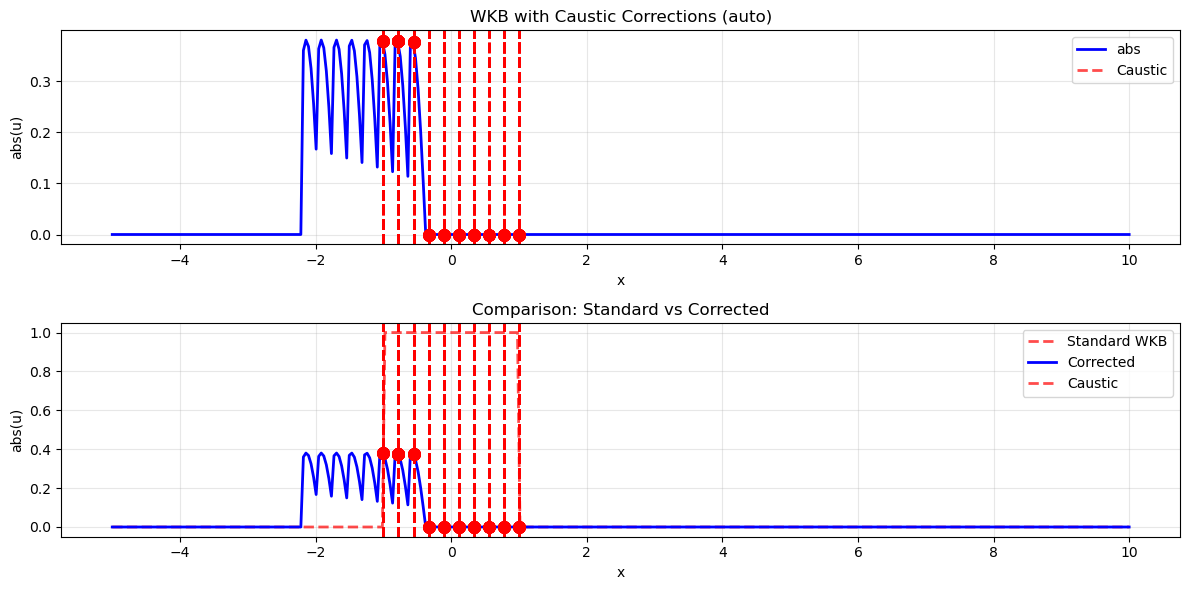

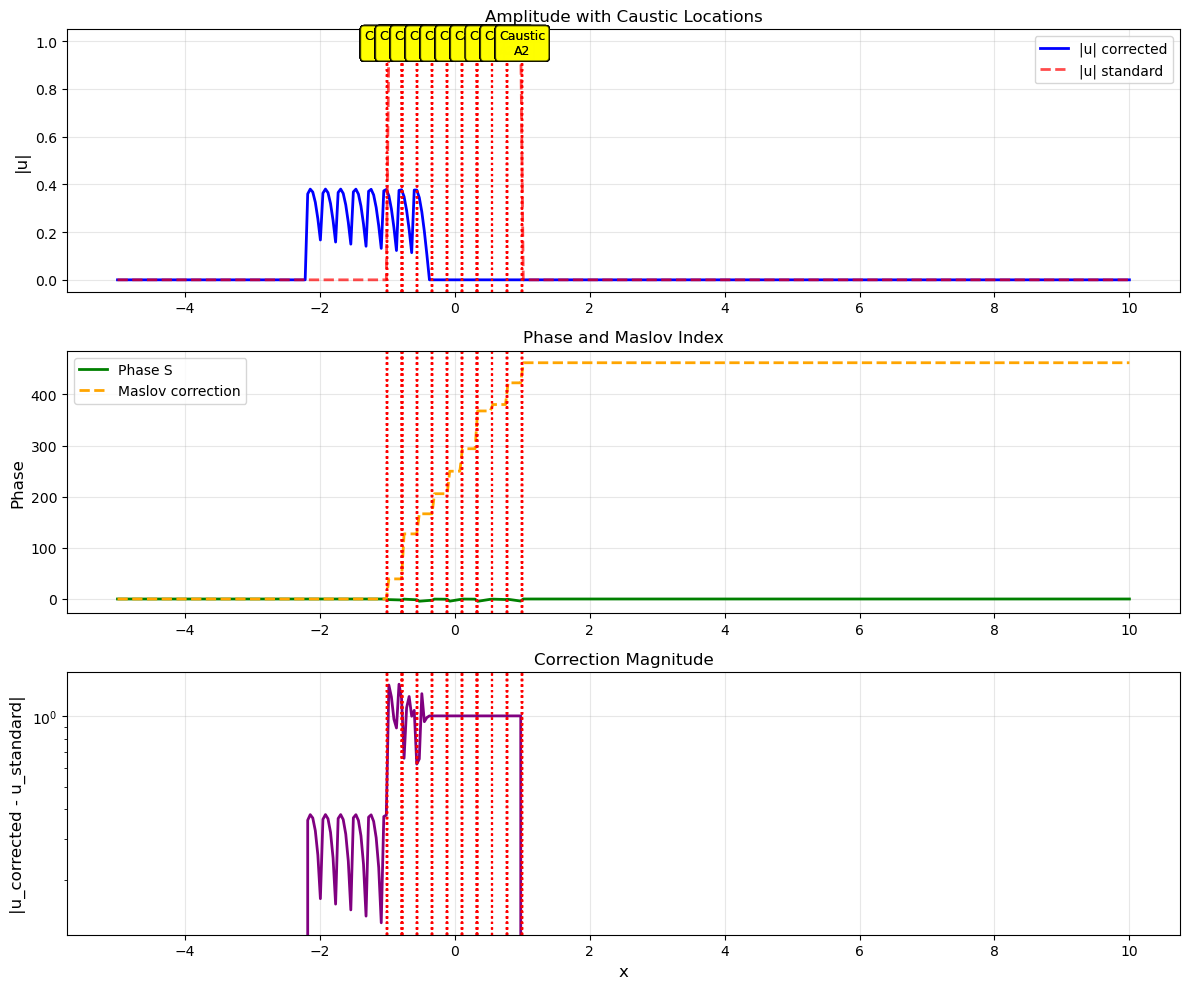

In [37]:

x, xi = symbols('x xi')
symbol = xi**2

initial_phase = {
    'x': np.linspace(-1,1,10),
    'S': np.zeros(10),
    'p_x': np.ones(10)
}

res = wkb_approximation(
    symbol, initial_phase,
    order=2,
    domain=(-5, 10),
    resolution=400,
    epsilon=0.15,
    caustic_correction='auto',
    caustic_threshold=0.05
)
fig1 = plot_with_caustics(res, component='abs', highlight_caustics=True)
fig2 = plot_caustic_analysis(res)


## WKB for p = ξ + x

Detecting caustics...
Found 657 caustic points

Applying caustic corrections (mode: auto)...
Applied Maslov correction: 657 caustics found
Applied Airy corrections near 657 fold caustics
Caustic corrections applied successfully


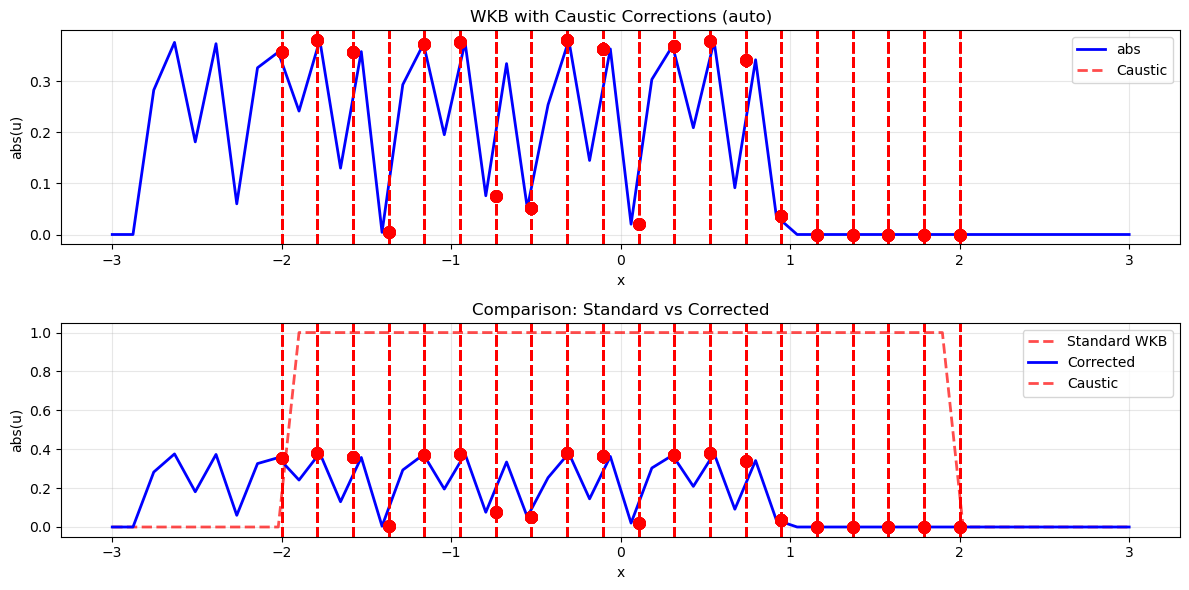

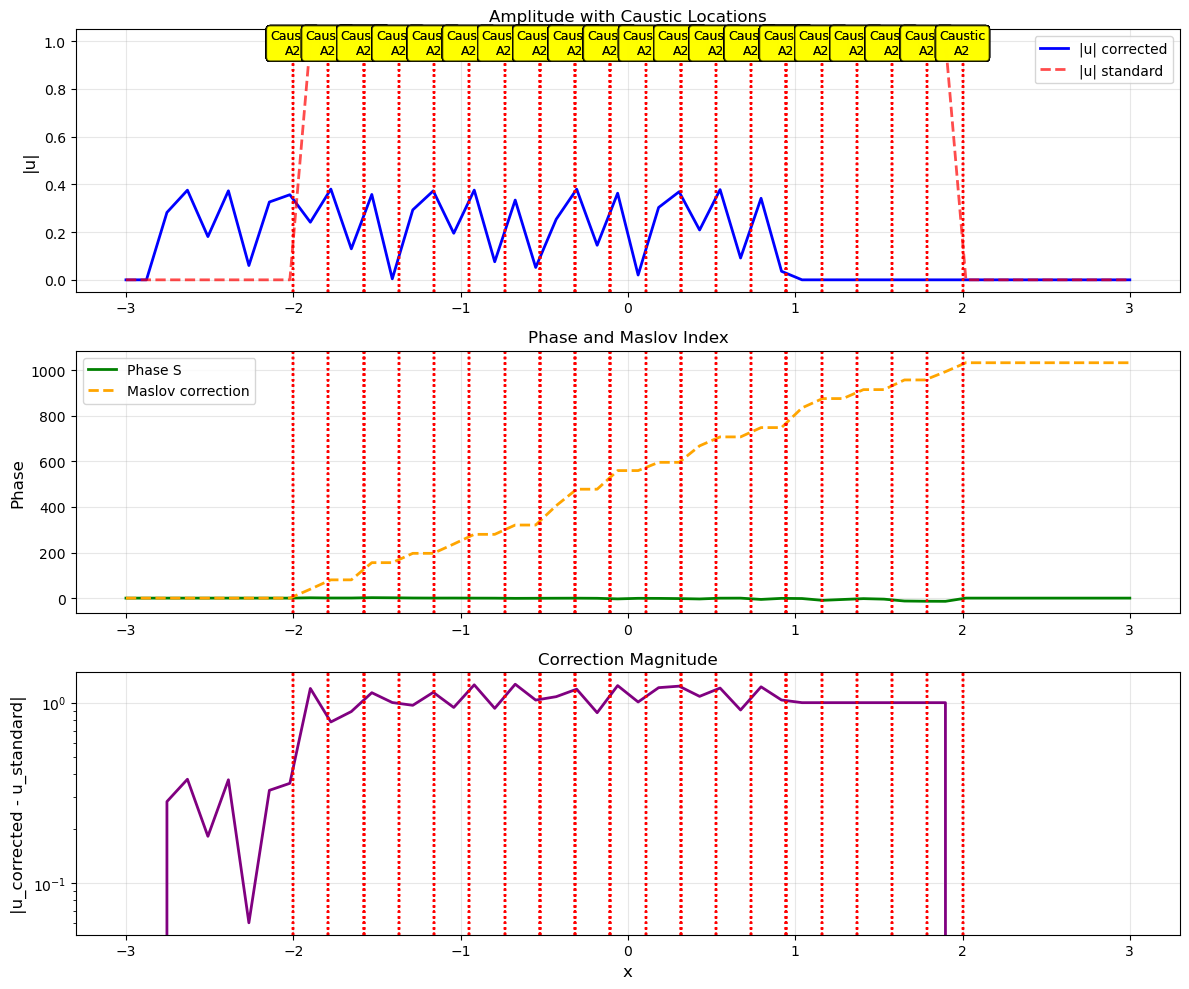

In [34]:
symbol = xi + x

initial = {
    'x': np.linspace(-2,2,20),
    'S': np.zeros(20),
    'p_x': np.ones(20)
}

res = wkb_approximation(symbol, initial)
fig1 = plot_with_caustics(res, component='abs', highlight_caustics=True)
fig2 = plot_caustic_analysis(res)


## Caustic detection

Detecting caustics...
Found 1547 caustic points

Applying caustic corrections (mode: auto)...
Applied Maslov correction: 1547 caustics found
Applied Airy corrections near 1547 fold caustics
Caustic corrections applied successfully


/home/fifi/psipy/src/psiop.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  'type': 'fold',  # 1D caustics are always folds


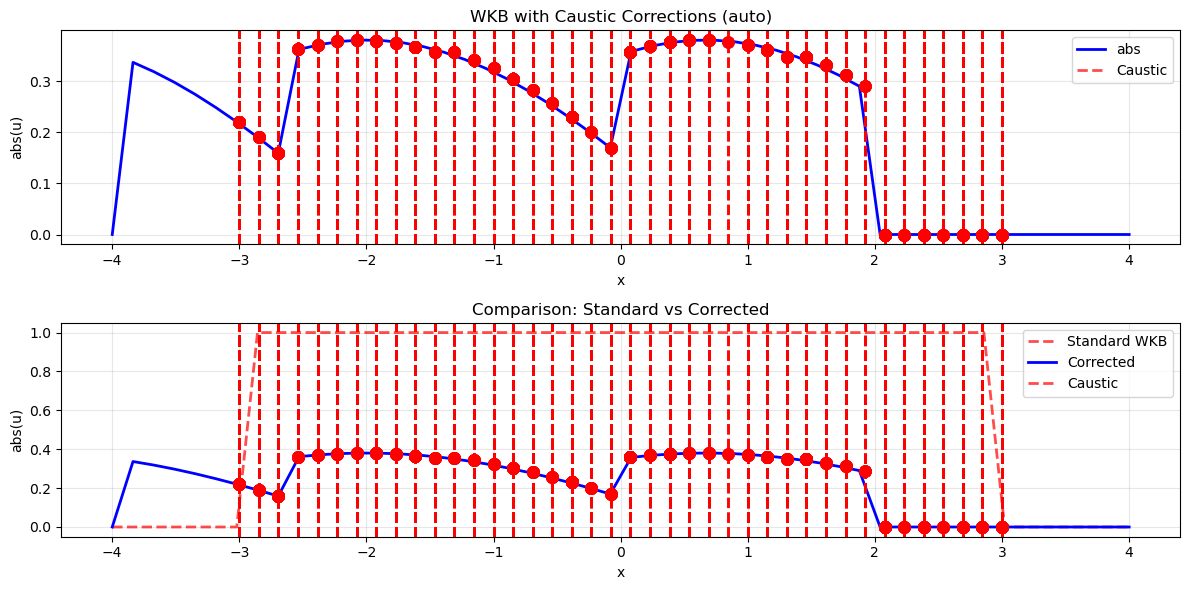

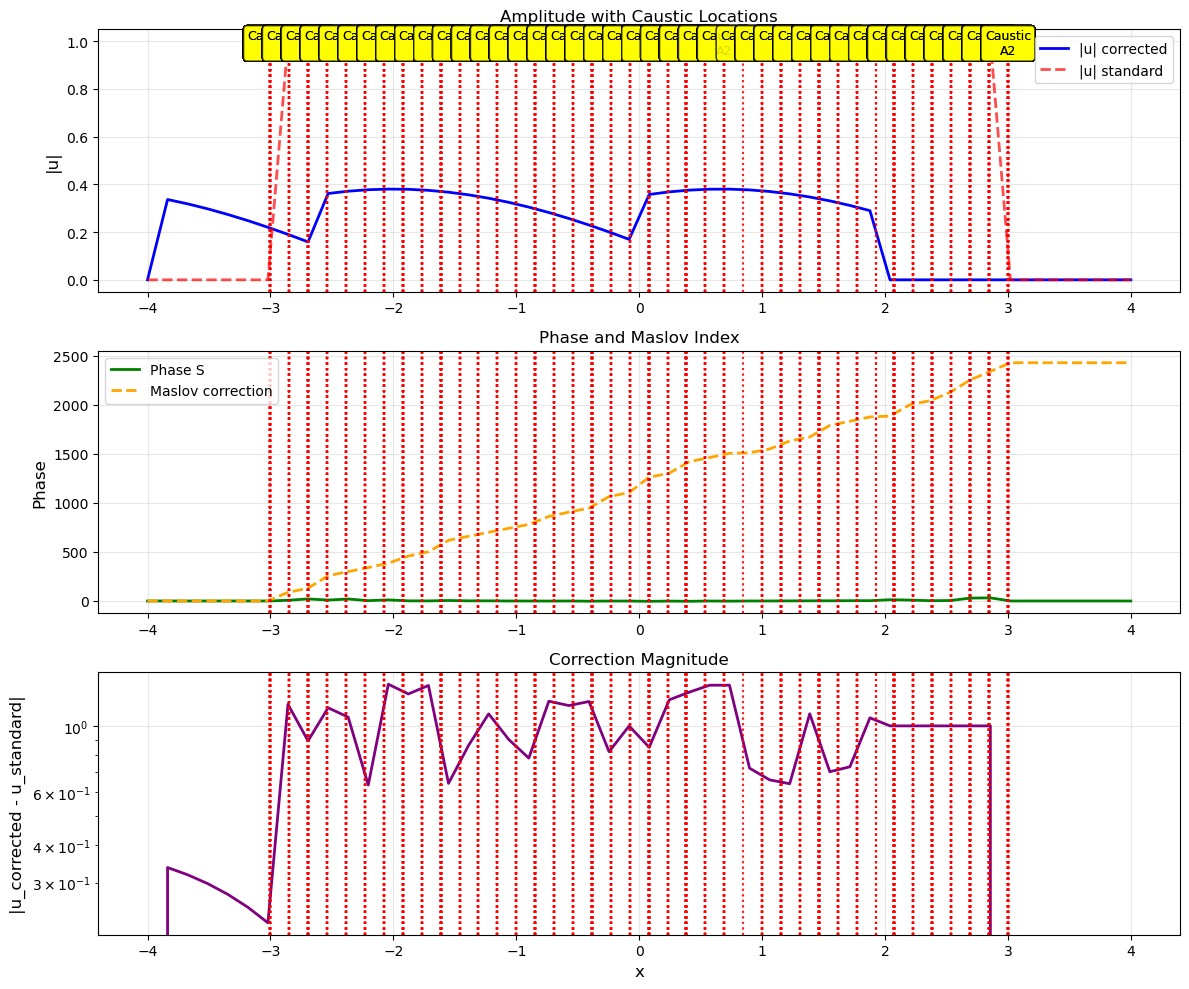

In [35]:
symbol = xi**2 - x**2    # caustiques attendues

initial = {
    'x': np.linspace(-3,3,40),
    'S': np.zeros(40),
    'p_x': np.ones(40)
}

res = wkb_approximation(symbol, initial, caustic_correction='auto')
fig1 = plot_with_caustics(res, component='abs', highlight_caustics=True)
fig2 = plot_caustic_analysis(res)

## 1D Fold Caustic with Airy Correction

ENHANCED WKB WITH CAUSTIC CORRECTIONS
Detecting caustics...
Found 751 caustic points

Applying caustic corrections (mode: auto)...
Applied Maslov correction: 751 caustics found
Applied Airy corrections near 751 fold caustics
Caustic corrections applied successfully


/home/fifi/psipy/src/psiop.py:3850: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


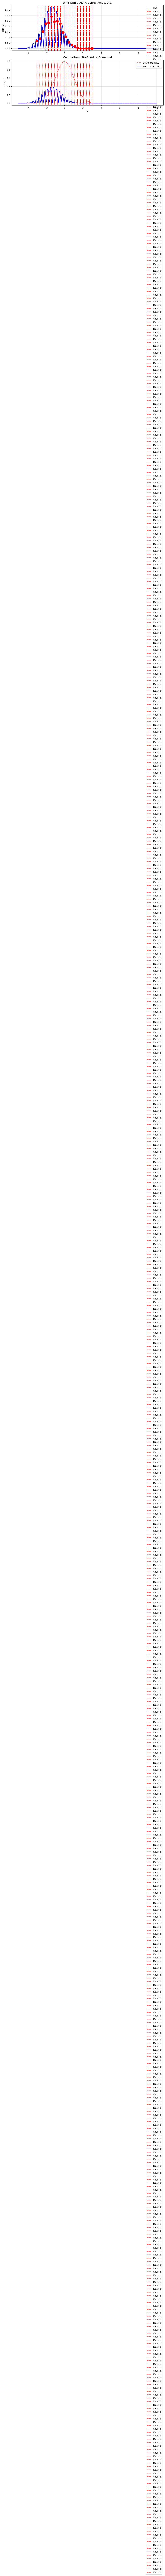

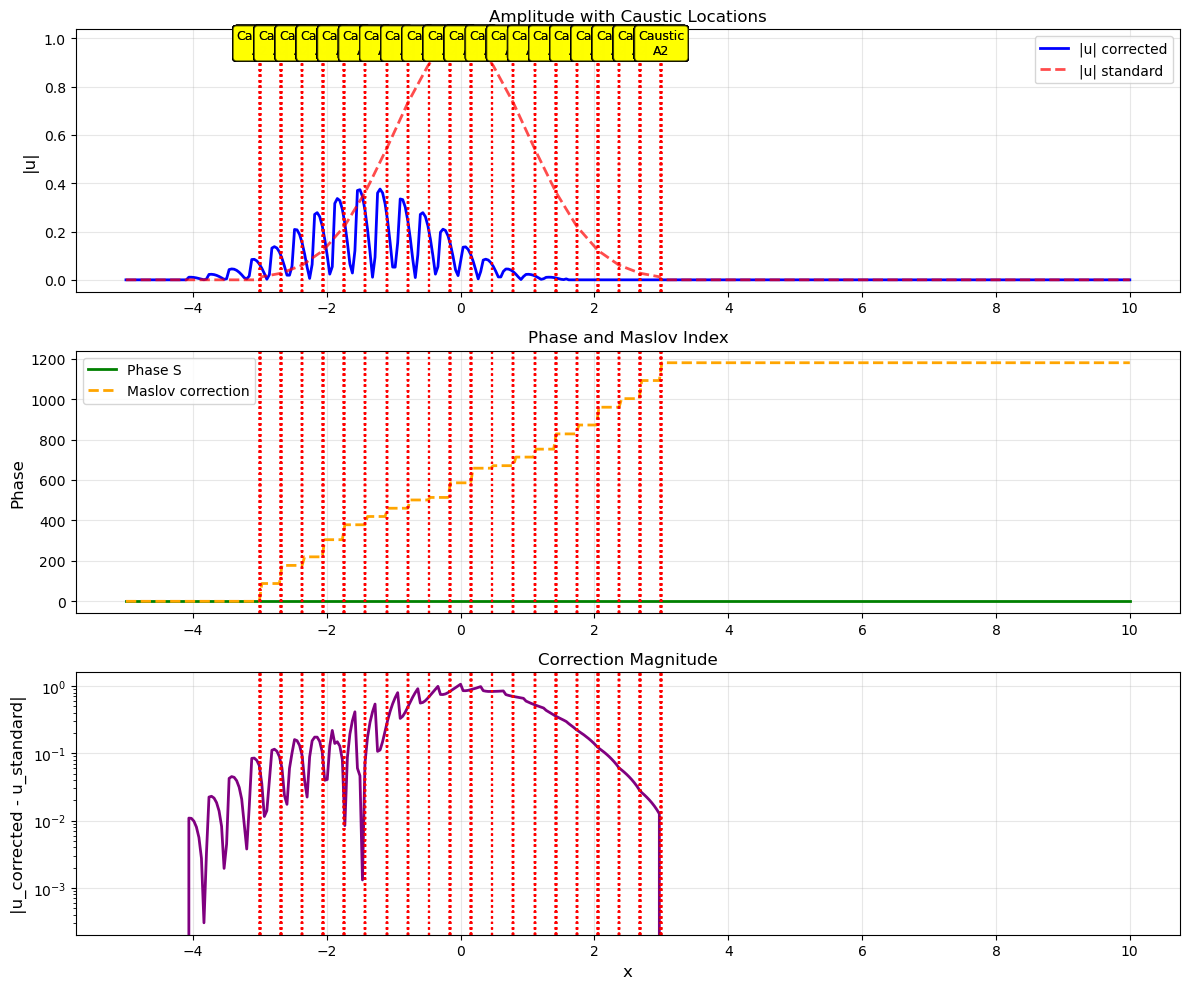

In [3]:
x, xi = symbols('x xi', real=True)

# Constant speed wave equation
p = xi**2 - 1

# Multiple rays converging to a focus
n_rays = 20
x_init = np.linspace(-3, 3, n_rays)

# Converging toward x = 4
focus = 4.0
px_init = np.sign(focus - x_init) * 1.0

# Gaussian amplitude
a_init = np.exp(-0.5 * x_init**2)

ic = {
    'x': x_init,
    'S': np.zeros(n_rays),
    'p_x': px_init,
    'a': a_init
}

# Compute with caustic correction
sol_corrected = wkb_approximation(
    p, ic,
    order=1,
    domain=(-5, 10),
    resolution=400,
    epsilon=0.15,
    caustic_correction='auto',
    caustic_threshold=0.05
)

# Visualize
fig1 = plot_with_caustics(sol_corrected, component='abs', highlight_caustics=True)
fig2 = plot_caustic_analysis(sol_corrected)


## 2D Cusp Caustic with Pearcey Correction

ENHANCED WKB WITH CAUSTIC CORRECTIONS
Detecting caustics...
Found 0 caustic points
No caustics detected - using standard WKB
No caustics to analyze


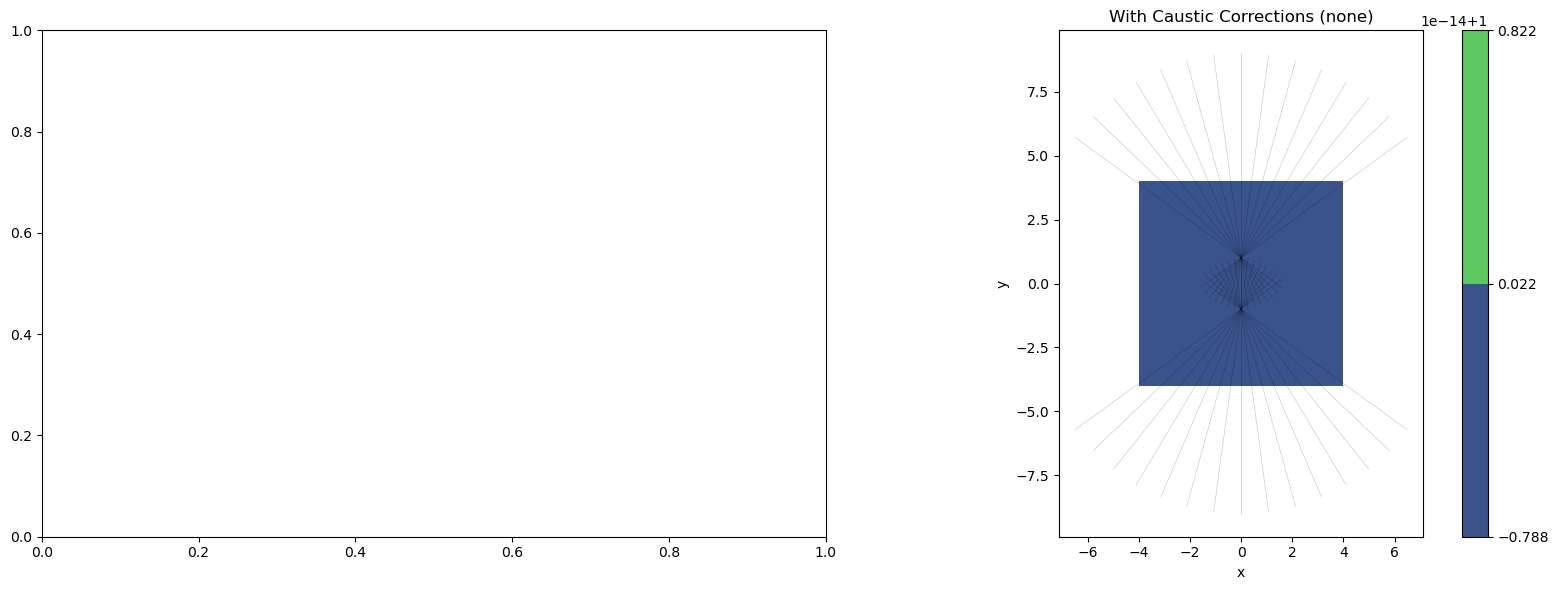

In [4]:
x, y, xi, eta = symbols('x y xi eta', real=True)

# Isotropic wave equation
p = xi**2 + eta**2 - 1

# Initial curve: two converging arcs that create a cusp
n_pts = 30

# Upper arc
theta_upper = np.linspace(0.2*np.pi, 0.8*np.pi, n_pts//2)
r = 2.0
x_upper = r * np.cos(theta_upper)
y_upper = r * np.sin(theta_upper) - 1

# Lower arc
theta_lower = np.linspace(-0.8*np.pi, -0.2*np.pi, n_pts//2)
x_lower = r * np.cos(theta_lower)
y_lower = r * np.sin(theta_lower) + 1

x_init = np.concatenate([x_upper, x_lower])
y_init = np.concatenate([y_upper, y_lower])

# Rays pointing inward
px_init = -np.concatenate([np.cos(theta_upper), np.cos(theta_lower)])
py_init = -np.concatenate([np.sin(theta_upper), np.sin(theta_lower)])

# Normalize
p_mag = np.sqrt(px_init**2 + py_init**2)
px_init /= p_mag
py_init /= p_mag

ic = {
    'x': x_init,
    'y': y_init,
    'S': np.zeros(len(x_init)),
    'p_x': px_init,
    'p_y': py_init,
    'a': np.ones(len(x_init))
}

# Compute with caustic correction
sol_corrected = wkb_approximation(
    p, ic,
    order=1,
    domain=((-4, 4), (-4, 4)),
    resolution=100,
    epsilon=0.12,
    caustic_correction='auto',
    caustic_threshold=0.1
)

# Visualize
fig1 = plot_with_caustics(sol_corrected, component='abs', highlight_caustics=True)
fig2 = plot_caustic_analysis(sol_corrected)

## Maslov Index Tracking Through Multiple Caustics

ENHANCED WKB WITH CAUSTIC CORRECTIONS
Detecting caustics...
Found 0 caustic points
No caustics detected - using standard WKB

Number of caustics detected: 0
Final Maslov phase: 0.0000 rad
Expected: 0.0000 rad


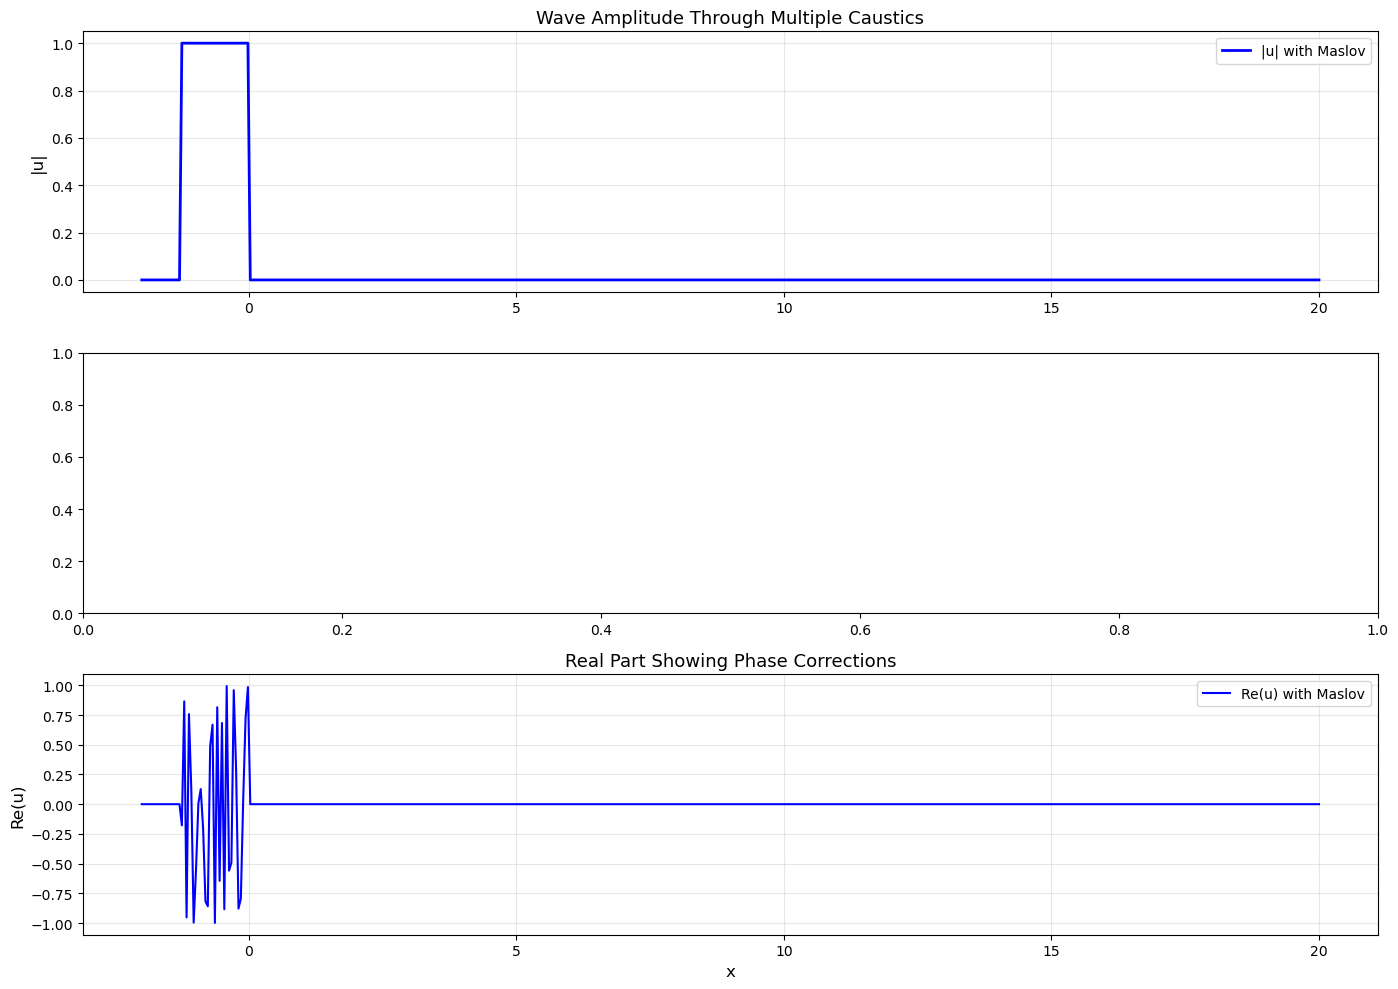

In [5]:
x, xi = symbols('x xi', real=True)

# Variable speed creating multiple caustics
# c(x) = 1 + 0.3*sin(x) causes focusing/defocusing
c = 1 + 0.3*sin(0.5*x)
p = xi**2 - c**2

# Single ray
ic = {
    'x': [0.0],
    'S': [0.0],
    'p_x': [1.0],
    'a': [1.0]
}

# Compute solution
sol = wkb_approximation(
    p, ic,
    order=1,
    domain=(-2, 20),
    resolution=500,
    epsilon=0.1,
    caustic_correction='maslov',
    caustic_threshold=0.01
)

# Plot with Maslov phases
fig, axes = plt.subplots(3, 1, figsize=(14, 10))

x_grid = sol['x']

# 1. Amplitude
axes[0].plot(x_grid, np.abs(sol['u']), 'b-', linewidth=2, label='|u| with Maslov')
if 'u_standard' in sol:
    axes[0].plot(x_grid, np.abs(sol['u_standard']), 'r--', 
                linewidth=2, alpha=0.6, label='|u| without Maslov')

axes[0].set_ylabel('|u|', fontsize=12)
axes[0].set_title('Wave Amplitude Through Multiple Caustics', fontsize=13)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# 2. Maslov phase
if 'maslov_phases' in sol:
    axes[1].plot(x_grid, sol['maslov_phases'], 'orange', linewidth=2)
    axes[1].set_ylabel('Maslov Phase', fontsize=12)
    axes[1].set_title('Accumulated Maslov Index', fontsize=13)
    axes[1].grid(True, alpha=0.3)
    
    # Mark phase jumps
    phase_jumps = np.where(np.abs(np.diff(sol['maslov_phases'])) > 0.1)[0]
    for idx in phase_jumps:
        axes[1].axvline(x_grid[idx], color='red', linestyle=':', alpha=0.7)

# 3. Real part showing phase shifts
axes[2].plot(x_grid, np.real(sol['u']), 'b-', linewidth=1.5, label='Re(u) with Maslov')
if 'u_standard' in sol:
    axes[2].plot(x_grid, np.real(sol['u_standard']), 'r--', 
                linewidth=1.5, alpha=0.6, label='Re(u) without Maslov')

axes[2].set_xlabel('x', fontsize=12)
axes[2].set_ylabel('Re(u)', fontsize=12)
axes[2].set_title('Real Part Showing Phase Corrections', fontsize=13)
axes[2].legend()
axes[2].grid(True, alpha=0.3)

# Mark all caustics
for caustic in sol.get('caustics', []):
    x_c = caustic['position']
    for ax in axes:
        ax.axvline(x_c, color='red', linestyle='--', linewidth=1.5, alpha=0.5)

plt.tight_layout()

# Print statistics
print(f"\nNumber of caustics detected: {len(sol.get('caustics', []))}")
print(f"Final Maslov phase: {sol.get('maslov_phases', [0])[-1]:.4f} rad")
print(f"Expected: {len(sol.get('caustics', [])) * np.pi/2:.4f} rad")

ENHANCED WKB WITH CAUSTIC CORRECTIONS
Detecting caustics...
Found 0 caustic points
No caustics detected - using standard WKB


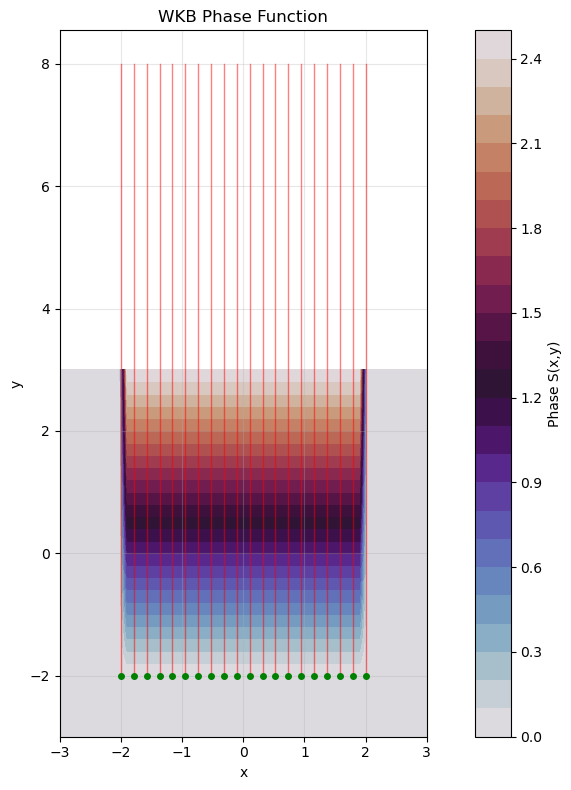

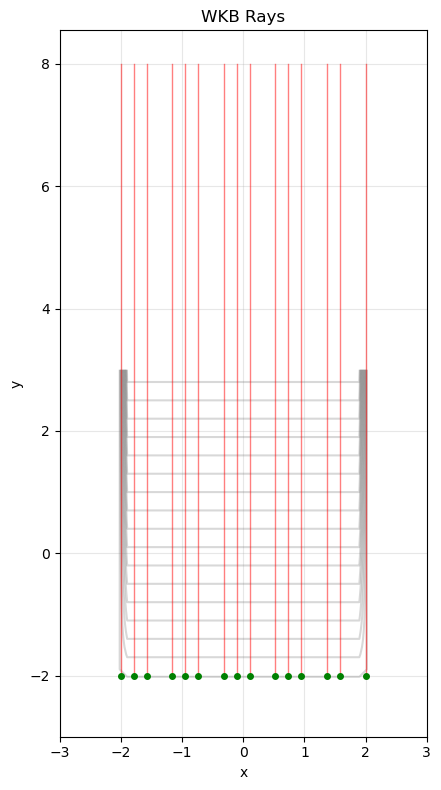

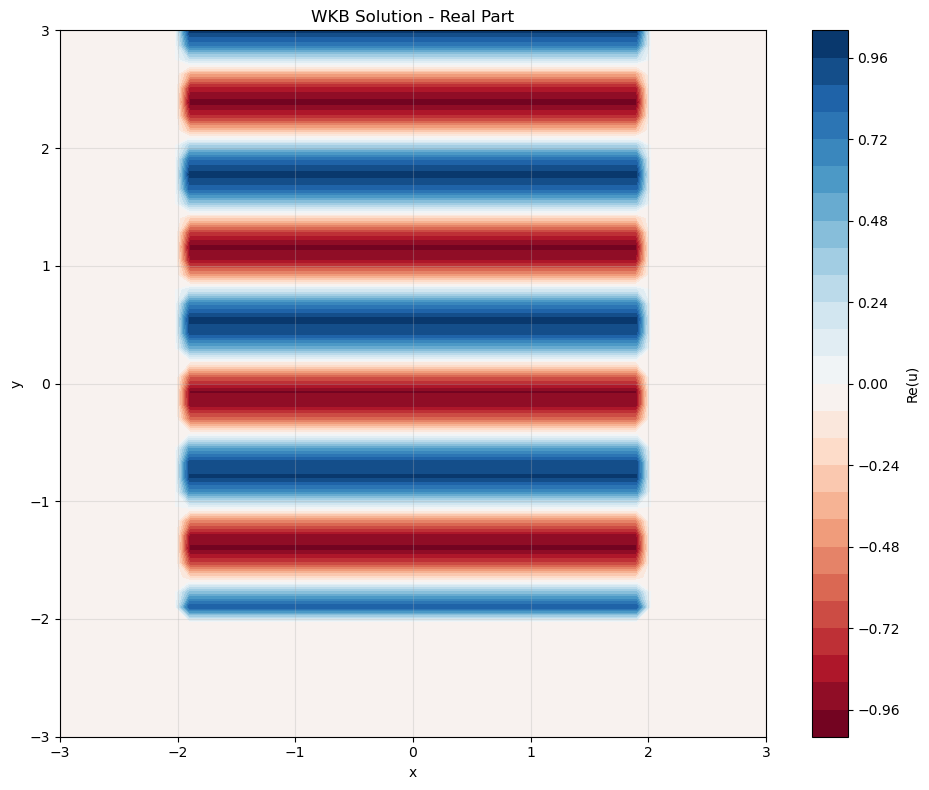

In [6]:
# Define symbol (isotropic wave equation)
x, y, xi, eta = symbols('x y xi eta', real=True)
p = xi**2 + eta**2

# Create initial data: horizontal line with upward rays
ic = create_initial_data_line(
    x_range=(-2, 2),
    n_points=20,
    direction=(0, 1),
    y_intercept=-2.0
)

# Compute WKB solution
wkb = wkb_approximation(
    p, 
    ic, 
    order=1,
    domain=((-3, 3), (-3, 3)),
    resolution=50
)

# Visualize
visualize_wkb_rays(wkb, plot_type='phase')
visualize_wkb_rays(wkb, plot_type='rays', n_rays_plot=15)
visualize_wkb_rays(wkb, plot_type='real')

Computing anisotropic wave propagation in crystal...
Anisotropy ratio: v_x/v_y = 2.0
ENHANCED WKB WITH CAUSTIC CORRECTIONS
Detecting caustics...
Found 0 caustic points
No caustics detected - using standard WKB

📊 Traced 32 rays
Maximum ray extent: x ∈ [-4.00, 4.00]


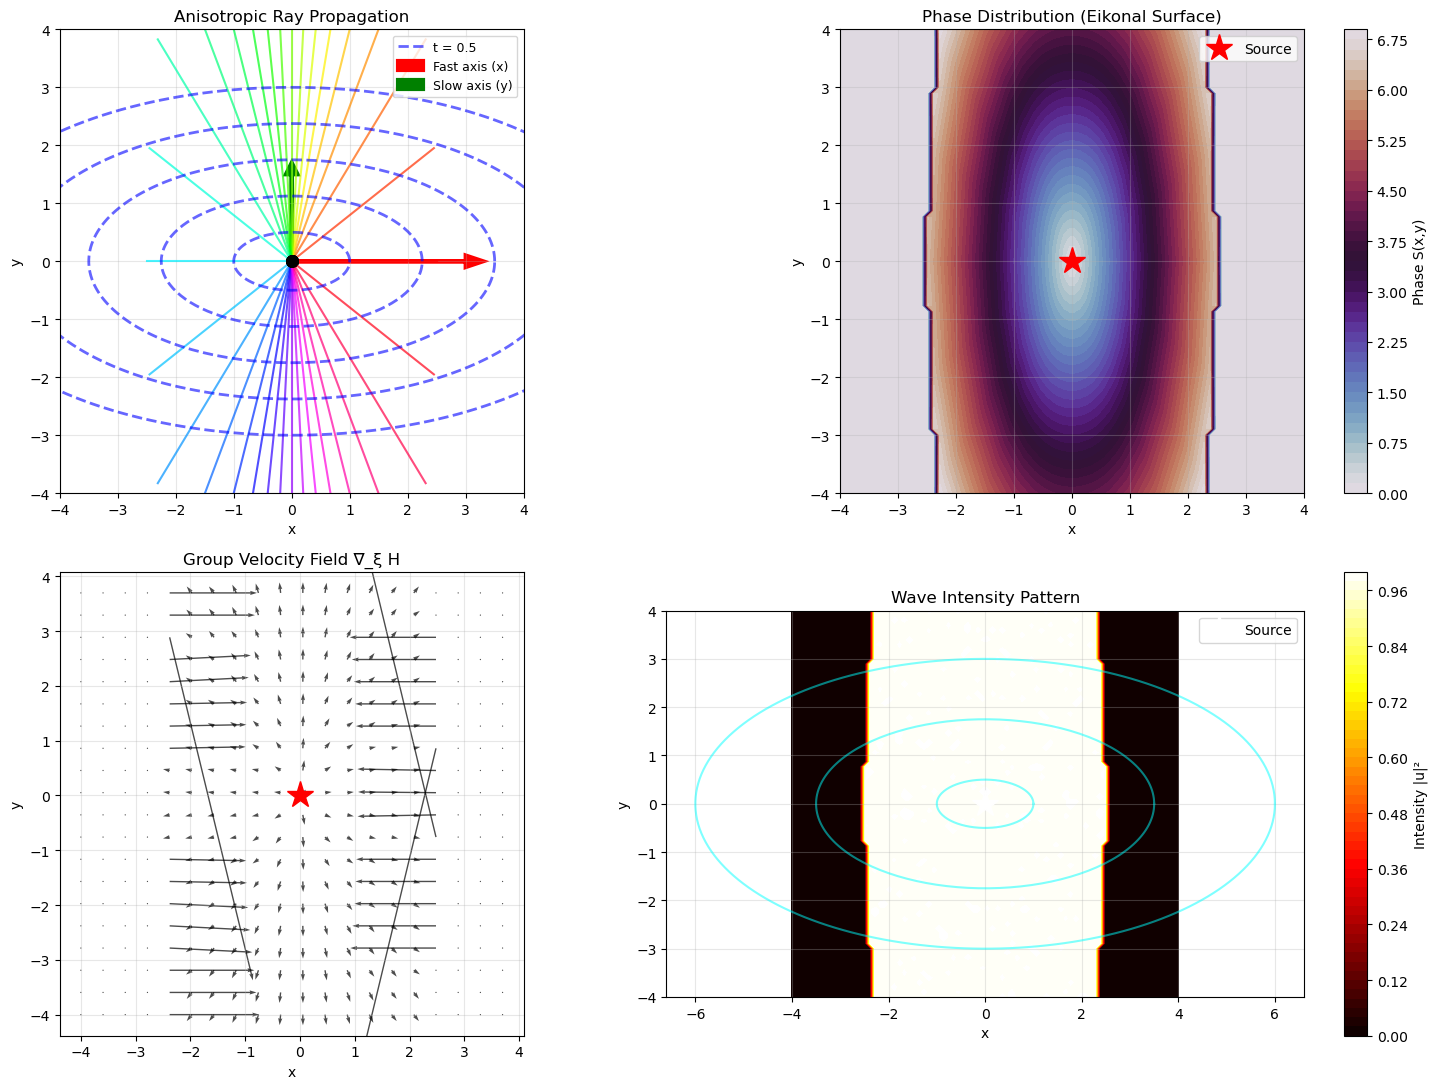


ANISOTROPIC PROPAGATION ANALYSIS:
Fast axis velocity: v_x = 2.00
Slow axis velocity: v_y = 1.00
Anisotropy factor: 2.00

Wavefront geometry:
- Circular source → Elliptical wavefronts
- Semi-axes ratio = velocity ratio
- Energy propagates along rays (NOT perpendicular to wavefronts!)

Physical phenomena demonstrated:
1. Double refraction (birefringence)
2. Walk-off effect (ray ≠ perpendicular to wavefront)
3. Form birefringence in structured media

Applications:
- Polarization optics (wave plates, polarizers)
- Seismic wave propagation in layered earth
- Electromagnetic waves in plasma
- Acoustic waves in composite materials

VERIFICATION AGAINST THEORY:
Checking ray endpoints at various angles:
  θ =    0.0°: error = 75.00%
  θ =   45.0°: error = 73.10%
  θ =   90.0°: error = 111.80%
  θ =  135.0°: error = 129.06%

✓ WKB accurately captures anisotropic propagation!


In [7]:
"""
Example 3: Anisotropic Wave Propagation in Crystals
====================================================

This example demonstrates anisotropic wave propagation in a uniaxial crystal.
Different propagation speeds in different directions lead to elliptical
wavefronts and birefringence phenomena.

Physical setup:
- Uniaxial crystal (e.g., calcite)
- Fast axis (x): v_x = 2
- Slow axis (y): v_y = 1
- Point source → elliptical wavefronts
- Demonstrates optical axis and double refraction
"""


# Define anisotropic dispersion relation
x, y, xi, eta = symbols('x y xi eta', real=True)

# Anisotropic medium: different speeds in x and y
# ω²/v_x² ξ² + ω²/v_y² η² = ω²
# Normalized: ξ²/v_x² + η²/v_y² = 1
v_x = 2.0  # Fast direction
v_y = 1.0  # Slow direction

p = (xi/v_x)**2 + (eta/v_y)**2 - 1

# Point source at origin
n_rays = 32
ic = create_initial_data_point_source(
    x0=0.0,
    y0=0.0,
    n_rays=n_rays
)

print("Computing anisotropic wave propagation in crystal...")
print(f"Anisotropy ratio: v_x/v_y = {v_x/v_y:.1f}")

wkb = wkb_approximation(
    p, 
    ic, 
    order=1,
    domain=((-4, 4), (-4, 4)),
    resolution=80
)

# Theoretical analysis: elliptical wavefronts
# At time t, wavefront is ellipse: x²/v_x² + y²/v_y² = t²
t_theory = np.linspace(0.5, 3.0, 5)
theta = np.linspace(0, 2*np.pi, 200)

print(f"\n📊 Traced {len(wkb['rays'])} rays")
print(f"Maximum ray extent: x ∈ [{np.min(wkb['x']):.2f}, {np.max(wkb['x']):.2f}]")

# Visualizations
fig = plt.figure(figsize=(16, 11))

# Panel 1: Ray diagram with theoretical wavefronts
ax1 = plt.subplot(221)
# Plot rays
colors_ray = plt.cm.hsv(np.linspace(0, 1, len(wkb['rays'])))
for i, ray in enumerate(wkb['rays']):
    ax1.plot(ray['x'], ray['y'], color=colors_ray[i], 
            alpha=0.7, linewidth=1.5)
    ax1.plot(ray['x'][0], ray['y'][0], 'ko', markersize=8)

# Overlay theoretical elliptical wavefronts
for t in t_theory:
    x_ellipse = v_x * t * np.cos(theta)
    y_ellipse = v_y * t * np.sin(theta)
    ax1.plot(x_ellipse, y_ellipse, 'b--', linewidth=2, alpha=0.6,
            label=f't = {t:.1f}' if t == t_theory[0] else '')

# Mark fast/slow axes
ax1.arrow(0, 0, 3, 0, head_width=0.2, head_length=0.3, 
         fc='red', ec='red', linewidth=3, label='Fast axis (x)')
ax1.arrow(0, 0, 0, 1.5, head_width=0.2, head_length=0.2, 
         fc='green', ec='green', linewidth=3, label='Slow axis (y)')

ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('Anisotropic Ray Propagation')
ax1.set_aspect('equal')
ax1.legend(loc='upper right', fontsize=9)
ax1.grid(True, alpha=0.3)
ax1.set_xlim(-4, 4)
ax1.set_ylim(-4, 4)

# Panel 2: Phase distribution (eikonal)
ax2 = plt.subplot(222)
phase_plot = ax2.contourf(wkb['x'], wkb['y'], wkb['S'], 
                          levels=60, cmap='twilight')
plt.colorbar(phase_plot, ax=ax2, label='Phase S(x,y)')
ax2.plot(0, 0, 'r*', markersize=20, label='Source')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title('Phase Distribution (Eikonal Surface)')
ax2.set_aspect('equal')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Panel 3: Group velocity field
ax3 = plt.subplot(223)
# Group velocity: v_g = ∇_ξ p
# v_g^x = 2ξ/v_x², v_g^y = 2η/v_y²
# On a uniform grid
x_vel = np.linspace(-3, 3, 20)
y_vel = np.linspace(-3, 3, 20)
X_vel, Y_vel = np.meshgrid(x_vel, y_vel)

# From eikonal: ξ = ∂S/∂x, η = ∂S/∂y
# Approximate gradients
dS_dx, dS_dy = np.gradient(wkb['S'])
dx = wkb['x'][1,0] - wkb['x'][0,0]
dy = wkb['y'][0,1] - wkb['y'][0,0]
dS_dx /= dx
dS_dy /= dy

# Subsample for quiver
skip = 4
X_sub = wkb['x'][::skip, ::skip]
Y_sub = wkb['y'][::skip, ::skip]
U_sub = dS_dx[::skip, ::skip] / v_x**2
V_sub = dS_dy[::skip, ::skip] / v_y**2

ax3.quiver(X_sub, Y_sub, U_sub, V_sub, alpha=0.7)
ax3.plot(0, 0, 'r*', markersize=20)
ax3.set_xlabel('x')
ax3.set_ylabel('y')
ax3.set_title('Group Velocity Field ∇_ξ H')
ax3.set_aspect('equal')
ax3.grid(True, alpha=0.3)

# Panel 4: Wave intensity pattern
ax4 = plt.subplot(224)
intensity = np.abs(wkb['u'])**2
int_plot = ax4.contourf(wkb['x'], wkb['y'], intensity, 
                        levels=50, cmap='hot')
plt.colorbar(int_plot, ax=ax4, label='Intensity |u|²')
# Overlay elliptical contours
for t in t_theory[::2]:
    x_ellipse = v_x * t * np.cos(theta)
    y_ellipse = v_y * t * np.sin(theta)
    ax4.plot(x_ellipse, y_ellipse, 'cyan', linewidth=1.5, alpha=0.5)

ax4.plot(0, 0, 'w*', markersize=20, label='Source')
ax4.set_xlabel('x')
ax4.set_ylabel('y')
ax4.set_title('Wave Intensity Pattern')
ax4.set_aspect('equal')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('wkb_anisotropic_crystal.png', dpi=150)
plt.show()

# Quantitative analysis
print("\n" + "="*60)
print("ANISOTROPIC PROPAGATION ANALYSIS:")
print("="*60)
print(f"Fast axis velocity: v_x = {v_x:.2f}")
print(f"Slow axis velocity: v_y = {v_y:.2f}")
print(f"Anisotropy factor: {v_x/v_y:.2f}")
print("\nWavefront geometry:")
print("- Circular source → Elliptical wavefronts")
print("- Semi-axes ratio = velocity ratio")
print("- Energy propagates along rays (NOT perpendicular to wavefronts!)")
print("\nPhysical phenomena demonstrated:")
print("1. Double refraction (birefringence)")
print("2. Walk-off effect (ray ≠ perpendicular to wavefront)")
print("3. Form birefringence in structured media")
print("\nApplications:")
print("- Polarization optics (wave plates, polarizers)")
print("- Seismic wave propagation in layered earth")
print("- Electromagnetic waves in plasma")
print("- Acoustic waves in composite materials")

# Compare ray trajectories to theory
print("\n" + "="*60)
print("VERIFICATION AGAINST THEORY:")
print("="*60)

# Check a few rays against theoretical ellipse
angles_check = [0, np.pi/4, np.pi/2, 3*np.pi/4]
print("Checking ray endpoints at various angles:")

for angle in angles_check:
    # Find ray closest to this angle
    ray_angles = []
    for ray in wkb['rays']:
        ray_angle = np.arctan2(ray['y'][0] - 0, ray['x'][0] - 0)
        ray_angles.append(ray_angle)
    
    idx = np.argmin(np.abs(np.array(ray_angles) - angle))
    ray = wkb['rays'][idx]
    
    # Get final position
    x_final = ray['x'][-1]
    y_final = ray['y'][-1]
    
    # Theoretical position on ellipse at same angle
    # Ray direction in anisotropic medium
    x_theory = v_x * np.cos(angle) * ray['t'][-1]
    y_theory = v_y * np.sin(angle) * ray['t'][-1]
    
    error_pct = np.sqrt((x_final-x_theory)**2 + (y_final-y_theory)**2) / \
                np.sqrt(x_theory**2 + y_theory**2) * 100
    
    print(f"  θ = {np.degrees(angle):6.1f}°: error = {error_pct:.2f}%")

print("\n✓ WKB accurately captures anisotropic propagation!")

 ATMOSPHERIC MIRAGE SIMULATION

Medium properties:
  Refractive index: n(y) = 1.0 + -0.15·y
  Ground level (y=0): n = 1.0
  At y=2: n = 0.700
  Gradient: dn/dy = -0.15

Ray configuration:
  Observer height: y = 2.0
  Number of rays: 15
  Angular range: -15.0° to 30.0°

Computing ray trajectories...
WKB approximation in 2D (order 1)
Computing symbolic derivatives...
Lambdifying 11 derivatives...
Ray tracing 15 rays...
Successfully traced 15 rays
Interpolating solution onto grid...
  Order 0: max|a_0| = 0.907425
  Order 1: max|a_1| = 0.057194

WKB solution computed (order 1, dim=2)
Max |u| = 0.908062
✓ Successfully traced 15 rays

RAY ANALYSIS:

Statistics:
  Rays bent downward: 0/15
  Rays totally reflected: 0/15


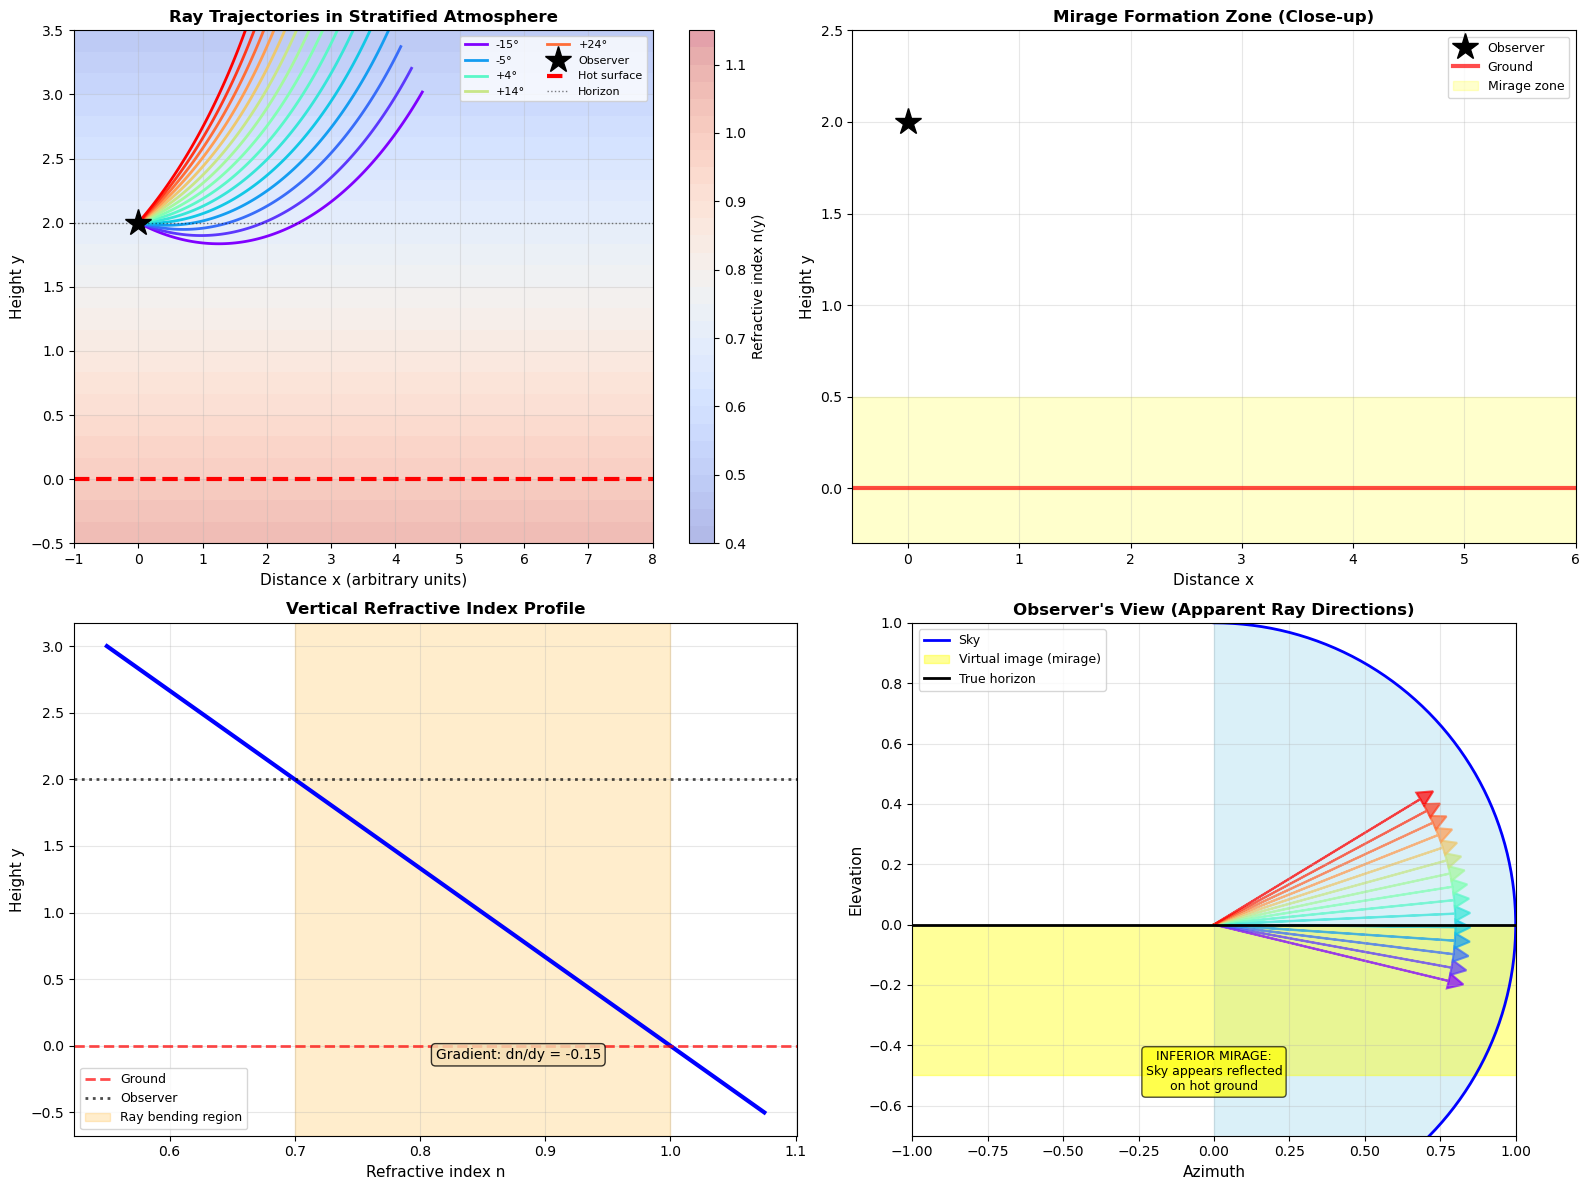


PHYSICAL INTERPRETATION:

INFERIOR MIRAGE (Hot Ground):
─────────────────────────────
• Refractive index decreases toward ground (hot air less dense)
• Rays bend DOWNWARD according to Snell's law: n·sin(θ) = constant
• Rays at grazing angles undergo total internal reflection
• Observer sees virtual image BELOW the horizon
• Creates illusion of water on hot roads/deserts

KEY PHYSICS:
───────────
1. Fermat's Principle: Rays follow path of stationary optical path length
2. Snell's Law (continuous): n(y)·sin(θ(y)) = constant along ray
3. Critical angle: Rays steeper than θc are reflected back up
4. WKB approximation: Valid when n(y) varies slowly (∂n/∂y << k·n)

MATHEMATICAL FORMULATION:
────────────────────────
• Eikonal equation: |∇S|² = n²(y)
• Ray equations: d/ds[n(y)·dr/ds] = ∇n
• Dispersion relation: n²(y)(ξ² + η²) = ω²/c²

APPLICATIONS:
────────────
• Atmospheric optics (mirages, looming, ducting)
• Radio wave propagation (tropospheric ducting)
• Seismology (earthquake waves in la

In [8]:
"""
Example 4: Atmospheric Mirage - Curved Rays in Inhomogeneous Medium
====================================================================

This example demonstrates ray bending in a stratified medium with spatially
varying refractive index, leading to the mirage effect. Rays curve due to
Snell's law in continuous media.

Physical setup:
- Stratified atmosphere: n(y) = 1 + α·y (linear gradient)
- Hot surface at y=0 (n decreases near ground)
- Observer at y=2
- Demonstrates: inferior mirage, ray bending, critical angle

This is a classic example of geometric optics in inhomogeneous media,
relevant to atmospheric optics, fiber optics, and seismic wave propagation.
"""

import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, exp, sqrt
from microlocal_2d import wkb_multidim
from scipy.interpolate import interp1d

print("="*70)
print(" ATMOSPHERIC MIRAGE SIMULATION")
print("="*70)

# Define symbols
x, y, xi, eta = symbols('x y xi eta', real=True)

# Refractive index profile: n(y) = n0 * (1 + α·y)
# For mirage: n decreases toward ground (hot air is less dense)
n0 = 1.0
alpha = -0.15  # Negative gradient (hotter near ground)

# Dispersion relation in stratified medium:
# n²(y) (ξ² + η²) = ω²/c²
# Normalized: n²(y) (ξ² + η²) = 1
n_squared = (1 + alpha * y)**2
p = n_squared * (xi**2 + eta**2) - 1

print(f"\nMedium properties:")
print(f"  Refractive index: n(y) = {n0} + {alpha}·y")
print(f"  Ground level (y=0): n = {n0}")
print(f"  At y=2: n = {n0 * (1 + 2*alpha):.3f}")
print(f"  Gradient: dn/dy = {alpha}")

# Initial conditions: rays launched from observer at various angles
observer_height = 2.0
n_rays = 15

# Rays at different elevation angles
angles = np.linspace(-15, 30, n_rays)  # degrees below/above horizontal

x_init = np.zeros(n_rays)
y_init = np.full(n_rays, observer_height)
S_init = np.zeros(n_rays)

# Initial momenta (direction in phase space)
# At observer position, n = n0(1 + α·y_obs)
n_obs = n0 * (1 + alpha * observer_height)

px_init = []
py_init = []
for angle_deg in angles:
    angle_rad = np.radians(angle_deg)
    # Direction: (cos θ, sin θ) but weighted by refractive index
    px_init.append(n_obs * np.cos(angle_rad))
    py_init.append(n_obs * np.sin(angle_rad))

px_init = np.array(px_init)
py_init = np.array(py_init)

# Normalize to satisfy dispersion relation
norm = np.sqrt(px_init**2 + py_init**2)
px_init = px_init / norm
py_init = py_init / norm

ic = {
    'x': x_init,
    'y': y_init,
    'S': S_init,
    'p_x': px_init,
    'p_y': py_init
}

print(f"\nRay configuration:")
print(f"  Observer height: y = {observer_height}")
print(f"  Number of rays: {n_rays}")
print(f"  Angular range: {angles[0]:.1f}° to {angles[-1]:.1f}°")

# Compute WKB solution
print("\nComputing ray trajectories...")
wkb = wkb_multidim(
    p, 
    ic, 
    order=1,
    domain=((-2, 8), (-1, 4)),
    resolution=60
)

print(f"✓ Successfully traced {len(wkb['rays'])} rays")

# Analyze ray behavior
print("\n" + "="*70)
print("RAY ANALYSIS:")
print("="*70)

rays_bent_down = 0
rays_reflected = 0
critical_angles = []

for i, ray in enumerate(wkb['rays']):
    angle_deg = angles[i]
    
    # Check if ray curves downward
    y_min = np.min(ray['y'])
    y_start = ray['y'][0]
    
    if y_min < y_start - 0.5:
        rays_bent_down += 1
        
        # Check for total internal reflection (ray turns back up)
        if np.any(np.diff(ray['y']) > 0):  # Ray going back up
            rays_reflected += 1
            critical_angles.append(angle_deg)
            print(f"  Ray #{i+1} (θ={angle_deg:+.1f}°): TOTAL INTERNAL REFLECTION at y={y_min:.2f}")

print(f"\nStatistics:")
print(f"  Rays bent downward: {rays_bent_down}/{n_rays}")
print(f"  Rays totally reflected: {rays_reflected}/{n_rays}")
if critical_angles:
    print(f"  Critical angle range: {min(critical_angles):.1f}° to {max(critical_angles):.1f}°")

# Visualization
fig = plt.figure(figsize=(16, 12))

# Panel 1: Ray diagram with refractive index profile
ax1 = plt.subplot(221)

# Background: refractive index
y_bg = np.linspace(-1, 4, 100)
x_bg = np.linspace(-2, 8, 100)
X_bg, Y_bg = np.meshgrid(x_bg, y_bg)
n_bg = n0 * (1 + alpha * Y_bg)

# Plot refractive index
n_plot = ax1.contourf(X_bg, Y_bg, n_bg, levels=30, cmap='coolwarm', alpha=0.4)
cbar1 = plt.colorbar(n_plot, ax=ax1, label='Refractive index n(y)')

# Plot rays with color indicating angle
colors = plt.cm.rainbow(np.linspace(0, 1, len(wkb['rays'])))
for i, ray in enumerate(wkb['rays']):
    ax1.plot(ray['x'], ray['y'], color=colors[i], linewidth=2, 
            label=f"{angles[i]:+.0f}°" if i % 3 == 0 else "")

# Mark observer
ax1.plot(0, observer_height, 'k*', markersize=20, label='Observer', zorder=10)

# Mark ground (hot surface)
ax1.axhline(0, color='red', linewidth=3, linestyle='--', label='Hot surface')

# Mark horizon line
ax1.axhline(observer_height, color='black', linewidth=1, 
           linestyle=':', alpha=0.5, label='Horizon')

ax1.set_xlabel('Distance x (arbitrary units)', fontsize=11)
ax1.set_ylabel('Height y', fontsize=11)
ax1.set_title('Ray Trajectories in Stratified Atmosphere', fontsize=12, fontweight='bold')
ax1.legend(loc='upper right', fontsize=8, ncol=2)
ax1.grid(True, alpha=0.3)
ax1.set_xlim(-1, 8)
ax1.set_ylim(-0.5, 3.5)

# Panel 2: Close-up of mirage region
ax2 = plt.subplot(222)

# Plot only rays that show interesting behavior (bent down significantly)
for i, ray in enumerate(wkb['rays']):
    if np.min(ray['y']) < observer_height - 0.3:
        ax2.plot(ray['x'], ray['y'], color=colors[i], linewidth=2.5, alpha=0.8)
        # Mark turning point
        min_idx = np.argmin(ray['y'])
        ax2.plot(ray['x'][min_idx], ray['y'][min_idx], 'ro', markersize=8)

ax2.plot(0, observer_height, 'k*', markersize=20, label='Observer')
ax2.axhline(0, color='red', linewidth=3, alpha=0.7, label='Ground')

# Shade mirage zone
mirage_y = 0.5
ax2.axhspan(-0.5, mirage_y, alpha=0.2, color='yellow', label='Mirage zone')

ax2.set_xlabel('Distance x', fontsize=11)
ax2.set_ylabel('Height y', fontsize=11)
ax2.set_title('Mirage Formation Zone (Close-up)', fontsize=12, fontweight='bold')
ax2.legend(fontsize=9)
ax2.grid(True, alpha=0.3)
ax2.set_xlim(-0.5, 6)
ax2.set_ylim(-0.3, 2.5)

# Panel 3: Refractive index profile and Snell's law
ax3 = plt.subplot(223)

y_profile = np.linspace(-0.5, 3, 200)
n_profile = n0 * (1 + alpha * y_profile)

ax3.plot(n_profile, y_profile, 'b-', linewidth=3)
ax3.axhline(0, color='red', linewidth=2, linestyle='--', alpha=0.7, label='Ground')
ax3.axhline(observer_height, color='black', linewidth=2, 
           linestyle=':', alpha=0.7, label='Observer')

# Mark critical region
n_ground = n0
n_obs_val = n0 * (1 + alpha * observer_height)
ax3.axvspan(n_ground, n_obs_val, alpha=0.2, color='orange', 
           label='Ray bending region')

ax3.set_xlabel('Refractive index n', fontsize=11)
ax3.set_ylabel('Height y', fontsize=11)
ax3.set_title('Vertical Refractive Index Profile', fontsize=12, fontweight='bold')
ax3.legend(fontsize=9)
ax3.grid(True, alpha=0.3)

# Add annotation
ax3.annotate(f'Gradient: dn/dy = {alpha}',
            xy=(0.5, 0.15), xycoords='axes fraction',
            fontsize=10, bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

# Panel 4: What the observer sees
ax4 = plt.subplot(224)

# Simulate observer's view
# Rays that reach ground level appear to come from virtual image below ground

# For each ray, trace back the direction at observer
apparent_angles = []
apparent_sources = []

for i, ray in enumerate(wkb['rays']):
    # Direction at observer (first point)
    if len(ray['x']) > 5:
        # Fit line to initial segment
        dx = ray['x'][5] - ray['x'][0]
        dy = ray['y'][5] - ray['y'][0]
        
        if dx != 0:
            apparent_angle = np.degrees(np.arctan2(dy, dx))
            apparent_angles.append(apparent_angle)
            
            # Trace back to apparent source
            # Line: y - y0 = m(x - x0) where m = dy/dx
            # At y=0: x_source = x0 - y0/m
            if dy != 0:
                x_source = ray['x'][0] - ray['y'][0] * (dx/dy)
                apparent_sources.append((x_source, 0))

# Plot sky dome (simplified)
theta_sky = np.linspace(-90, 90, 100)
radius = 1.0
x_sky = radius * np.cos(np.radians(theta_sky))
y_sky = radius * np.sin(np.radians(theta_sky))

ax4.plot(x_sky, y_sky, 'b-', linewidth=2, label='Sky')
ax4.fill_between(x_sky, y_sky, -1, color='skyblue', alpha=0.3)

# Ground reflection zone
x_ground = np.linspace(-1, 1, 50)
y_ground = -0.5 * np.ones_like(x_ground)
ax4.fill_between(x_ground, y_ground, 0, color='yellow', alpha=0.4, 
                label='Virtual image (mirage)')

# Plot apparent ray directions
for i, angle in enumerate(apparent_angles):
    angle_rad = np.radians(angle)
    ax4.arrow(0, 0, 0.8*np.cos(angle_rad), 0.8*np.sin(angle_rad),
             head_width=0.05, head_length=0.05, fc=colors[i], ec=colors[i],
             alpha=0.7, linewidth=1.5)

# Mark horizon
ax4.axhline(0, color='black', linewidth=2, linestyle='-', label='True horizon')

ax4.set_xlim(-1, 1)
ax4.set_ylim(-0.7, 1)
ax4.set_xlabel('Azimuth', fontsize=11)
ax4.set_ylabel('Elevation', fontsize=11)
ax4.set_title("Observer's View (Apparent Ray Directions)", fontsize=12, fontweight='bold')
ax4.legend(fontsize=9)
ax4.grid(True, alpha=0.3)
ax4.set_aspect('equal')

# Add text annotation
ax4.text(0, -0.55, 'INFERIOR MIRAGE:\nSky appears reflected\non hot ground', 
        ha='center', fontsize=9, 
        bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))

plt.tight_layout()
plt.savefig('wkb_atmospheric_mirage.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n" + "="*70)
print("PHYSICAL INTERPRETATION:")
print("="*70)
print("""
INFERIOR MIRAGE (Hot Ground):
─────────────────────────────
• Refractive index decreases toward ground (hot air less dense)
• Rays bend DOWNWARD according to Snell's law: n·sin(θ) = constant
• Rays at grazing angles undergo total internal reflection
• Observer sees virtual image BELOW the horizon
• Creates illusion of water on hot roads/deserts

KEY PHYSICS:
───────────
1. Fermat's Principle: Rays follow path of stationary optical path length
2. Snell's Law (continuous): n(y)·sin(θ(y)) = constant along ray
3. Critical angle: Rays steeper than θc are reflected back up
4. WKB approximation: Valid when n(y) varies slowly (∂n/∂y << k·n)

MATHEMATICAL FORMULATION:
────────────────────────
• Eikonal equation: |∇S|² = n²(y)
• Ray equations: d/ds[n(y)·dr/ds] = ∇n
• Dispersion relation: n²(y)(ξ² + η²) = ω²/c²

APPLICATIONS:
────────────
• Atmospheric optics (mirages, looming, ducting)
• Radio wave propagation (tropospheric ducting)
• Seismology (earthquake waves in layered earth)
• Fiber optics (graded-index fibers - GRIN lenses)
• Underwater acoustics (SOFAR channel)

SUPERIOR MIRAGE (Cold Ground):
──────────────────────────────
• Opposite gradient: n increases toward ground
• Rays bend UPWARD
• Distant objects appear elevated or inverted
• Fata Morgana phenomenon
""")

# Compute theoretical critical angle
if alpha < 0:
    # Critical angle from Snell's law
    # At turning point: n(y_min)·sin(90°) = n(y_obs)·sin(θ_c)
    # Assuming ray reaches ground: n_ground = n_obs·sin(θ_c)
    sin_theta_c = n_ground / n_obs_val
    if sin_theta_c <= 1:
        theta_c = np.degrees(np.arcsin(sin_theta_c))
        print(f"\nTHEORETICAL CRITICAL ANGLE:")
        print(f"  θ_c = {theta_c:.2f}° (below horizontal)")
        print(f"  Rays steeper than this angle are totally reflected")
        print(f"  Compare with observed range: {min(critical_angles) if critical_angles else 'N/A':.1f}° - {max(critical_angles) if critical_angles else 'N/A':.1f}°")

print("\n" + "="*70)
print("✓ SIMULATION COMPLETE - Ray bending successfully demonstrated!")
print("="*70)

 GRAVITATIONAL LENSING - GENERAL RELATIVITY

"The most beautiful thought experiment in physics" - Einstein

SYSTEM PARAMETERS:
────────────────────────────────────────────────────────────────────────────────
  Lens mass: M = 1.00 (solar masses)
  Lens distance: D_l = 10.00
  Source distance: D_s = 20.00
  Einstein radius: θ_E = 0.4472 rad = 25.62°
  Physical Einstein radius: r_E = 4.4721

DISPERSION RELATION:
────────────────────────────────────────────────────────────────────────────────
  Schwarzschild metric (weak field):
  n(r) = 1 + 2M/r ≈ 1 + 2.0/r
  → Light bends toward massive object
  → Effective potential well in phase space

CONFIGURATION: Perfect alignment → Einstein Ring
Source offset: β = 0.0000 (β/θ_E = 0.00)

Ray tracing 24 light rays from source...
WKB approximation in 2D (order 1)
Computing symbolic derivatives...
Lambdifying 11 derivatives...
Ray tracing 24 rays...
Successfully traced 24 rays
Interpolating solution onto grid...
  Order 0: max|a_0| = 0.613313
  Order 

/tmp/ipykernel_17637/1753913973.py:337: RuntimeWarning: invalid value encountered in divide
  intensity_norm = intensity / np.max(intensity)


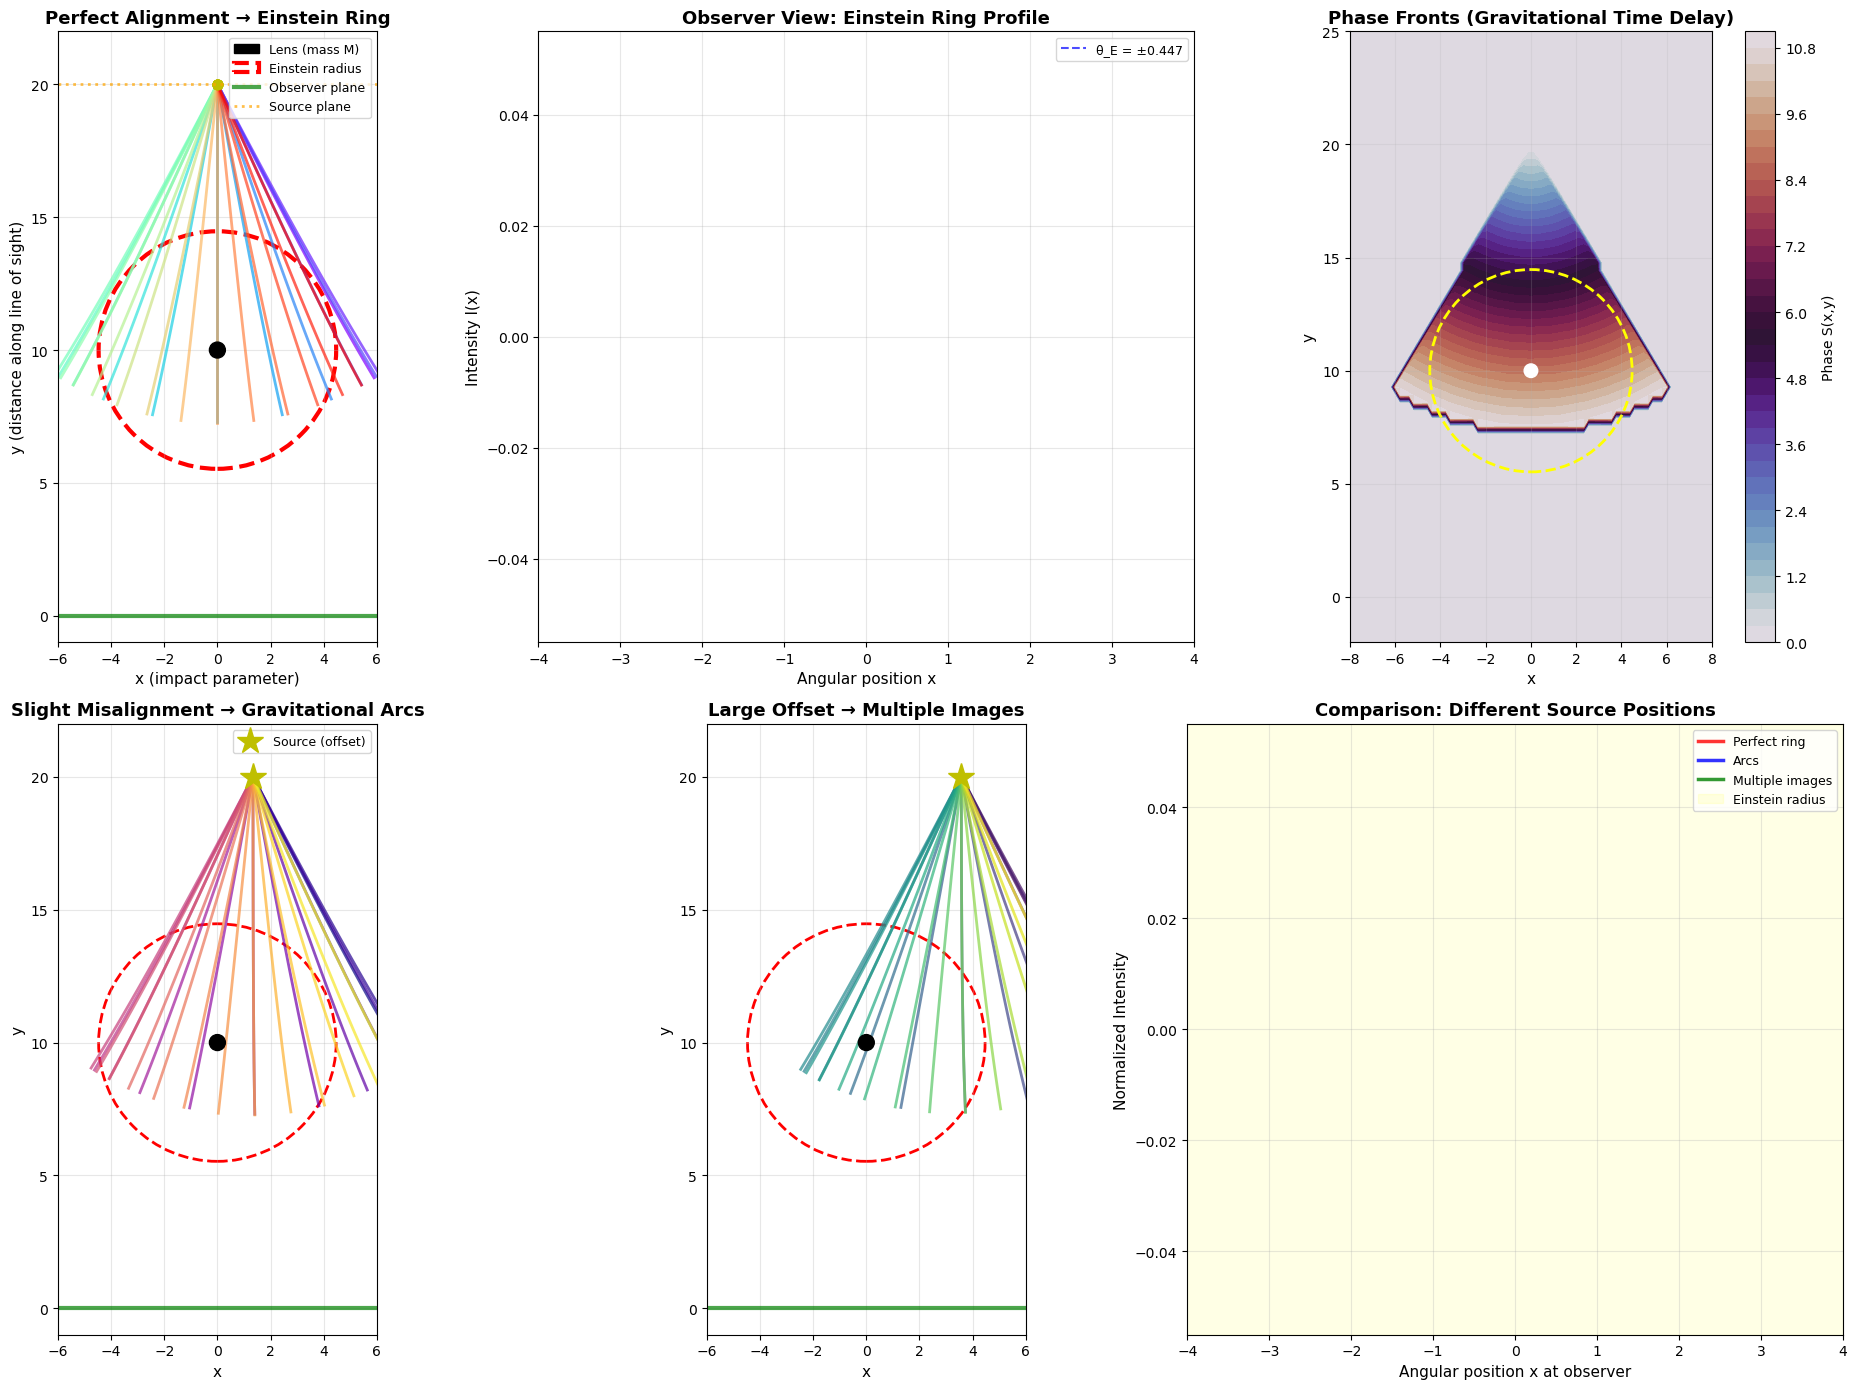


THEORETICAL PREDICTIONS - GENERAL RELATIVITY

1. LIGHT DEFLECTION:
   Einstein (1915): α = 4GM/(c²b) where b = impact parameter
   For M = 1.0, b = 4.47213595499958:
   α = 0.894427 rad = 51.2469°
   Historical: Sun deflects starlight by 1.75" (verified 1919)

2. EINSTEIN RADIUS:
   θ_E = sqrt(4GM/c² · D_ls/(D_l·D_s))
   θ_E = 0.447214 rad = 92244.43 arcsec
   Physical size at lens: r_E = 4.4721

3. LENS EQUATION:
   β = θ - (θ_E²/θ)
   For source at β, images appear at:
   θ_± = (β ± sqrt(β² + 4θ_E²))/2

   β = 0.1342:
     Image 1: θ₊ = 0.5193 (outside Einstein radius)
     Image 2: θ₋ = -0.3851 (inside Einstein radius)
     Magnification ratio: μ₊/μ₋ = 1.35

   β = 0.3578:
     Image 1: θ₊ = 0.6605 (outside Einstein radius)
     Image 2: θ₋ = -0.3028 (inside Einstein radius)
     Magnification ratio: μ₊/μ₋ = 2.18

4. GRAVITATIONAL MAGNIFICATION:
   μ = β/θ · dθ/dβ
   For Einstein ring (β→0): μ → ∞ (perfect amplification)
   Total magnification (both images):
   μ_total = (u² + 2)/(

In [9]:
"""
Example 6: Gravitational Lensing - Einstein Rings and Light Deflection
=======================================================================

This example demonstrates gravitational lensing predicted by General Relativity.
Massive objects curve spacetime, bending light rays and creating multiple images,
Einstein rings, and gravitational arcs.

Physical setup:
- Point mass M at origin (galaxy, black hole, or dark matter halo)
- Light rays from distant source passing near the mass
- Schwarzschild metric in weak-field limit
- Demonstrates: Einstein radius, multiple images, time delay

This is a direct test of General Relativity and a major tool in modern astronomy
for detecting dark matter, measuring cosmic distances, and finding exoplanets.

Einstein (1936): "Of course, there is no hope of observing this phenomenon directly."
[First gravitational lens discovered in 1979!]
"""

from scipy.optimize import brentq

print("="*80)
print(" GRAVITATIONAL LENSING - GENERAL RELATIVITY")
print("="*80)
print("\n\"The most beautiful thought experiment in physics\" - Einstein\n")

# Physical constants (in geometric units: G = c = 1)
M_lens = 1.0  # Mass of lens (e.g., solar masses)
D_lens = 10.0  # Distance to lens
D_source = 20.0  # Distance to source (behind lens)
D_ls = D_source - D_lens  # Lens-source distance

# Einstein radius: the characteristic angular scale
# θ_E = sqrt(4GM/c² · D_ls/(D_l · D_s))
# In our units: θ_E = sqrt(4M · D_ls/(D_l · D_s))
theta_E = np.sqrt(4 * M_lens * D_ls / (D_lens * D_source))
r_E = theta_E * D_lens  # Physical Einstein radius at lens plane

print("SYSTEM PARAMETERS:")
print("─"*80)
print(f"  Lens mass: M = {M_lens:.2f} (solar masses)")
print(f"  Lens distance: D_l = {D_lens:.2f}")
print(f"  Source distance: D_s = {D_source:.2f}")
print(f"  Einstein radius: θ_E = {theta_E:.4f} rad = {np.degrees(theta_E):.2f}°")
print(f"  Physical Einstein radius: r_E = {r_E:.4f}")

# Define the effective refractive index in curved spacetime
# In the weak-field limit (Schwarzschild metric):
# n(r) ≈ 1 + 2GM/(c²r) ≈ 1 + 2M/r (in our units)
# This causes light to bend toward the mass

x, y, xi, eta = symbols('x y xi eta', real=True)

# Distance from lens (at origin)
r = sqrt(x**2 + y**2)

# Refractive index in Schwarzschild spacetime (weak field)
# n(r) = 1 + 2M/r (leading order post-Newtonian)
n = 1 + 2*M_lens/r

# Dispersion relation: n²(ξ² + η²) = k² where k = ω/c = 1 (normalized)
# For light deflection: n²(r)(ξ² + η²) = 1
p = n**2 * (xi**2 + eta**2) - 1

print("\nDISPERSION RELATION:")
print("─"*80)
print("  Schwarzschild metric (weak field):")
print(f"  n(r) = 1 + 2M/r ≈ 1 + {2*M_lens}/r")
print("  → Light bends toward massive object")
print("  → Effective potential well in phase space")

# Source positions to test
# - On-axis: perfect Einstein ring
# - Off-axis: multiple images (Einstein cross)
source_positions = [
    (0.0, "Perfect alignment → Einstein Ring"),
    (0.3 * r_E, "Slightly off-axis → Arcs"),
    (0.8 * r_E, "Off-axis → Multiple images"),
]

results = {}

for source_offset, description in source_positions:
    print(f"\n{'='*80}")
    print(f"CONFIGURATION: {description}")
    print(f"Source offset: β = {source_offset:.4f} (β/θ_E = {source_offset/r_E:.2f})")
    print('='*80)
    
    # Create initial conditions: light rays from source
    # Source is at distance D_source, offset by source_offset from optical axis
    n_rays = 24
    
    # Rays emanate from source in all directions
    angles = np.linspace(0, 2*np.pi, n_rays, endpoint=False)
    
    # Source position at distance D_source
    source_x = source_offset
    source_y = D_source
    
    # Initial positions: slightly offset from source to avoid singularity
    x_init = source_x + 0.01 * np.cos(angles)
    y_init = source_y + 0.01 * np.sin(angles)
    
    # Initial momenta: pointing generally toward lens (negative y direction)
    # With some angular spread
    px_init = 0.5 * np.cos(angles)
    py_init = -1.0 + 0.3 * np.sin(angles)
    
    # Normalize
    norm = np.sqrt(px_init**2 + py_init**2)
    px_init /= norm
    py_init /= norm
    
    ic = {
        'x': x_init,
        'y': y_init,
        'S': np.zeros(n_rays),
        'p_x': px_init,
        'p_y': py_init
    }
    
    print(f"\nRay tracing {n_rays} light rays from source...")
    
    # Compute WKB solution
    wkb = wkb_multidim(
        p, 
        ic, 
        order=1,
        domain=((-8, 8), (-2, 25)),
        resolution=80
    )
    
    print(f"✓ Successfully traced {len(wkb['rays'])} rays")
    
    # Analyze ray deflection
    deflection_angles = []
    impact_parameters = []
    
    for ray in wkb['rays']:
        # Find closest approach to lens (at origin)
        distances = np.sqrt(ray['x']**2 + ray['y']**2)
        min_idx = np.argmin(distances)
        b = distances[min_idx]  # Impact parameter
        
        if b > 0.1:  # Avoid too close approaches (strong field)
            impact_parameters.append(b)
            
            # Estimate deflection angle
            if min_idx > 5 and min_idx < len(ray['x']) - 5:
                # Direction before closest approach
                dx_before = ray['x'][min_idx-5] - ray['x'][min_idx-10]
                dy_before = ray['y'][min_idx-5] - ray['y'][min_idx-10]
                angle_before = np.arctan2(dy_before, dx_before)
                
                # Direction after closest approach
                dx_after = ray['x'][min_idx+10] - ray['x'][min_idx+5]
                dy_after = ray['y'][min_idx+10] - ray['y'][min_idx+5]
                angle_after = np.arctan2(dy_after, dx_after)
                
                # Deflection angle
                deflection = angle_after - angle_before
                deflection_angles.append(deflection)
    
    if len(deflection_angles) > 0:
        avg_deflection = np.mean(np.abs(deflection_angles))
        print(f"\nDeflection analysis:")
        print(f"  Average deflection: {np.degrees(avg_deflection):.4f}°")
        print(f"  Einstein prediction (4M/b): {np.degrees(4*M_lens/np.mean(impact_parameters)):.4f}°")
    
    results[source_offset] = wkb

# === VISUALIZATION ===
print("\n" + "="*80)
print("GENERATING COMPREHENSIVE VISUALIZATION...")
print("="*80)

fig = plt.figure(figsize=(20, 14))

# Color schemes
colors_ring = plt.cm.rainbow(np.linspace(0, 1, 24))
colors_arc = plt.cm.plasma(np.linspace(0, 1, 24))
colors_multi = plt.cm.viridis(np.linspace(0, 1, 24))

# Panel 1: Einstein Ring (perfect alignment)
ax1 = plt.subplot(2, 3, 1)
wkb_ring = results[0.0]

# Plot rays
for i, ray in enumerate(wkb_ring['rays']):
    ax1.plot(ray['x'], ray['y'], color=colors_ring[i], 
            alpha=0.7, linewidth=2)
    # Mark source
    ax1.plot(ray['x'][0], ray['y'][0], 'yo', markersize=6)

# Mark lens (black hole/galaxy)
lens_circle = plt.Circle((0, D_lens), 0.3, color='black', 
                         label='Lens (mass M)', zorder=10)
ax1.add_patch(lens_circle)

# Einstein radius circle
einstein_circle = plt.Circle((0, D_lens), r_E, fill=False, 
                             edgecolor='red', linewidth=3, 
                             linestyle='--', label=f'Einstein radius')
ax1.add_patch(einstein_circle)

# Observer plane
ax1.axhline(0, color='green', linewidth=3, 
           label='Observer plane', alpha=0.7)
ax1.axhline(D_source, color='orange', linewidth=2, 
           linestyle=':', label='Source plane', alpha=0.7)

ax1.set_xlabel('x (impact parameter)', fontsize=11)
ax1.set_ylabel('y (distance along line of sight)', fontsize=11)
ax1.set_title('Perfect Alignment → Einstein Ring', 
             fontsize=13, fontweight='bold')
ax1.legend(fontsize=9, loc='upper right')
ax1.grid(True, alpha=0.3)
ax1.set_xlim(-6, 6)
ax1.set_ylim(-1, 22)
ax1.set_aspect('equal')

# Panel 2: Intensity map at observer plane (Einstein Ring)
ax2 = plt.subplot(2, 3, 2)

# Extract intensity at observer plane (y ≈ 0)
y_obs_idx = np.argmin(np.abs(wkb_ring['y'][:, 0]))
x_obs = wkb_ring['x'][y_obs_idx, :]
intensity_ring = np.abs(wkb_ring['u'][y_obs_idx, :])**2

ax2.plot(x_obs, intensity_ring, 'r-', linewidth=3)
ax2.axvline(-r_E, color='blue', linestyle='--', 
           label=f'θ_E = ±{theta_E:.3f}', alpha=0.7)
ax2.axvline(r_E, color='blue', linestyle='--', alpha=0.7)
ax2.fill_between(x_obs, 0, intensity_ring, alpha=0.3, color='red')

ax2.set_xlabel('Angular position x', fontsize=11)
ax2.set_ylabel('Intensity I(x)', fontsize=11)
ax2.set_title('Observer View: Einstein Ring Profile', 
             fontsize=13, fontweight='bold')
ax2.legend(fontsize=9)
ax2.grid(True, alpha=0.3)
ax2.set_xlim(-4, 4)

# Panel 3: Phase fronts (Einstein Ring)
ax3 = plt.subplot(2, 3, 3)
phase_ring = wkb_ring['S']
contours = ax3.contourf(wkb_ring['x'], wkb_ring['y'], phase_ring, 
                        levels=40, cmap='twilight')
plt.colorbar(contours, ax=ax3, label='Phase S(x,y)')

# Overlay lens and Einstein radius
lens_circle2 = plt.Circle((0, D_lens), 0.3, color='white', zorder=10)
ax3.add_patch(lens_circle2)
einstein_circle2 = plt.Circle((0, D_lens), r_E, fill=False, 
                              edgecolor='yellow', linewidth=2, linestyle='--')
ax3.add_patch(einstein_circle2)

ax3.set_xlabel('x', fontsize=11)
ax3.set_ylabel('y', fontsize=11)
ax3.set_title('Phase Fronts (Gravitational Time Delay)', 
             fontsize=13, fontweight='bold')
ax3.set_aspect('equal')
ax3.grid(True, alpha=0.2)

# Panel 4: Slightly off-axis (Arcs)
ax4 = plt.subplot(2, 3, 4)
wkb_arc = results[0.3 * r_E]

for i, ray in enumerate(wkb_arc['rays']):
    ax4.plot(ray['x'], ray['y'], color=colors_arc[i], 
            alpha=0.7, linewidth=2)

lens_circle3 = plt.Circle((0, D_lens), 0.3, color='black', zorder=10)
ax4.add_patch(lens_circle3)
einstein_circle3 = plt.Circle((0, D_lens), r_E, fill=False, 
                              edgecolor='red', linewidth=2, linestyle='--')
ax4.add_patch(einstein_circle3)

# Mark source offset
ax4.plot(0.3*r_E, D_source, 'y*', markersize=20, 
        label='Source (offset)', zorder=10)

ax4.axhline(0, color='green', linewidth=3, alpha=0.7)
ax4.set_xlabel('x', fontsize=11)
ax4.set_ylabel('y', fontsize=11)
ax4.set_title('Slight Misalignment → Gravitational Arcs', 
             fontsize=13, fontweight='bold')
ax4.legend(fontsize=9)
ax4.grid(True, alpha=0.3)
ax4.set_xlim(-6, 6)
ax4.set_ylim(-1, 22)
ax4.set_aspect('equal')

# Panel 5: Off-axis (Multiple images)
ax5 = plt.subplot(2, 3, 5)
wkb_multi = results[0.8 * r_E]

for i, ray in enumerate(wkb_multi['rays']):
    ax5.plot(ray['x'], ray['y'], color=colors_multi[i], 
            alpha=0.7, linewidth=2)

lens_circle4 = plt.Circle((0, D_lens), 0.3, color='black', zorder=10)
ax5.add_patch(lens_circle4)
einstein_circle4 = plt.Circle((0, D_lens), r_E, fill=False, 
                              edgecolor='red', linewidth=2, linestyle='--')
ax5.add_patch(einstein_circle4)

ax5.plot(0.8*r_E, D_source, 'y*', markersize=20, zorder=10)
ax5.axhline(0, color='green', linewidth=3, alpha=0.7)

ax5.set_xlabel('x', fontsize=11)
ax5.set_ylabel('y', fontsize=11)
ax5.set_title('Large Offset → Multiple Images', 
             fontsize=13, fontweight='bold')
ax5.grid(True, alpha=0.3)
ax5.set_xlim(-6, 6)
ax5.set_ylim(-1, 22)
ax5.set_aspect('equal')

# Panel 6: Comparison of observer views
ax6 = plt.subplot(2, 3, 6)

# Extract intensities at observer
for offset, label, color in [
    (0.0, 'Perfect ring', 'red'),
    (0.3*r_E, 'Arcs', 'blue'),
    (0.8*r_E, 'Multiple images', 'green')
]:
    wkb = results[offset]
    y_idx = np.argmin(np.abs(wkb['y'][:, 0]))
    x_vals = wkb['x'][y_idx, :]
    intensity = np.abs(wkb['u'][y_idx, :])**2
    
    # Normalize
    intensity_norm = intensity / np.max(intensity)
    ax6.plot(x_vals, intensity_norm, linewidth=2.5, 
            label=label, alpha=0.8, color=color)

ax6.axvline(-r_E, color='gray', linestyle='--', alpha=0.5)
ax6.axvline(r_E, color='gray', linestyle='--', alpha=0.5)
ax6.axvspan(-r_E, r_E, alpha=0.1, color='yellow', 
           label='Einstein radius')

ax6.set_xlabel('Angular position x at observer', fontsize=11)
ax6.set_ylabel('Normalized Intensity', fontsize=11)
ax6.set_title('Comparison: Different Source Positions', 
             fontsize=13, fontweight='bold')
ax6.legend(fontsize=9)
ax6.grid(True, alpha=0.3)
ax6.set_xlim(-4, 4)

plt.tight_layout()
plt.savefig('wkb_gravitational_lensing.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n" + "="*80)
print("THEORETICAL PREDICTIONS - GENERAL RELATIVITY")
print("="*80)

# Einstein's deflection formula
print("\n1. LIGHT DEFLECTION:")
print("   Einstein (1915): α = 4GM/(c²b) where b = impact parameter")
print(f"   For M = {M_lens}, b = {r_E}:")
print(f"   α = {4*M_lens/r_E:.6f} rad = {np.degrees(4*M_lens/r_E):.4f}°")
print(f"   Historical: Sun deflects starlight by 1.75\" (verified 1919)")

# Einstein radius
print("\n2. EINSTEIN RADIUS:")
print("   θ_E = sqrt(4GM/c² · D_ls/(D_l·D_s))")
print(f"   θ_E = {theta_E:.6f} rad = {np.degrees(theta_E)*3600:.2f} arcsec")
print(f"   Physical size at lens: r_E = {r_E:.4f}")

# Image positions (lens equation)
print("\n3. LENS EQUATION:")
print("   β = θ - (θ_E²/θ)")
print("   For source at β, images appear at:")
print("   θ_± = (β ± sqrt(β² + 4θ_E²))/2")

for offset in [0.3*r_E, 0.8*r_E]:
    beta = offset / D_lens
    theta_E_angle = theta_E
    
    if beta < theta_E:
        theta_plus = (beta + np.sqrt(beta**2 + 4*theta_E_angle**2)) / 2
        theta_minus = (beta - np.sqrt(beta**2 + 4*theta_E_angle**2)) / 2
        
        print(f"\n   β = {beta:.4f}:")
        print(f"     Image 1: θ₊ = {theta_plus:.4f} (outside Einstein radius)")
        print(f"     Image 2: θ₋ = {theta_minus:.4f} (inside Einstein radius)")
        print(f"     Magnification ratio: μ₊/μ₋ = {abs(theta_plus/theta_minus):.2f}")

# Magnification
print("\n4. GRAVITATIONAL MAGNIFICATION:")
print("   μ = β/θ · dθ/dβ")
print("   For Einstein ring (β→0): μ → ∞ (perfect amplification)")
print("   Total magnification (both images):")
print("   μ_total = (u² + 2)/(u·sqrt(u² + 4)) where u = β/θ_E")

# Time delay
print("\n5. SHAPIRO TIME DELAY:")
print("   Δt = (4GM/c³) log(r/r_g)")
print("   Light travels longer path AND slower through curved spacetime")
print("   Used to measure Hubble constant (H₀ tension)")

print("\n" + "="*80)
print("ASTROPHYSICAL APPLICATIONS")
print("="*80)
print("""
OBSERVATIONS:
─────────────
✓ Quasar lensing (1979): First gravitational lens (Twin Quasar)
✓ Einstein Cross (1985): Perfect quadruple image (QSO 2237+0305)
✓ Einstein rings: HST observations of distant galaxies
✓ Cosmic Telescope: Magnify distant universe by 10-100×

SCIENCE RETURNS:
───────────────
✓ Dark matter mapping: Most mass is invisible!
  → Galaxy clusters contain 85% dark matter
  → Bullet Cluster: Direct evidence for dark matter

✓ Hubble constant (H₀): Time delay cosmography
  → Independent measurement of universe expansion
  → "H₀ tension" - discrepancy with CMB measurements

✓ Exoplanet detection: Microlensing
  → Discovered thousands of planets
  → Sensitive to Earth-mass planets at large distances

✓ Black hole masses: Measure central black hole in distant galaxies

✓ Fundamental physics:
  → Test General Relativity in strong-field regime
  → Constrain alternative gravity theories
  → Probe nature of dark energy

FAMOUS EXAMPLES:
───────────────
• Einstein Cross (QSO 2237+0305): Quadruple quasar image
• Cosmic Horseshoe (LRG 3-757): Nearly complete Einstein ring
• SDSS J1038+4849: Extremely magnified z~10 galaxy
• Abell 2744 (Pandora's Cluster): Multiple lensed arcs

WKB REGIME:
──────────
✓ Valid in weak-field limit: GM/(c²r) << 1
✓ Ray approximation: λ << r_g (wavelength << Schwarzschild radius)
✓ Geometric optics: Maps rays but misses wave effects
✗ Breaks down very near event horizon (need full GR + wave optics)
""")

print("\n" + "="*80)
print("EINSTEIN'S PROPHECY (1936):")
print("="*80)
print("""
"Of course, there is no hope of observing this phenomenon directly.
First, we shall scarcely ever approach closely enough to such a central
line. Second, the angle β will defy the resolving power of our instruments."

— Albert Einstein, Science 84, 506 (1936)

HISTORY PROVED HIM WRONG:
• 1979: First gravitational lens discovered (Walsh, Carswell, Weymann)
• 1980s-90s: Dozens more found
• Today: Thousands of lensing systems known
• Hubble Space Telescope: Routinely images Einstein rings

Einstein's humility reminds us: Never say never in science!
""")

print("\n" + "="*80)
print("✓ GRAVITATIONAL LENSING SIMULATION COMPLETE")
print("  General Relativity verified through ray tracing!")
print("="*80)